# Bayesian statistics and decision analysis

## Learning goals
- Understand bayes formula and how to combine prior information into an analysis
- Understand the key differences between a frequentist and bayesian perspective on uncertainty and inference
- Understand the practical advantages and disadvantages of bayesian statistics
- Understand how to create a simple decision analysis model

## Literature
- You can skim ROS Ch. 9 
- [Think Bayes](http://allendowney.github.io/ThinkBayes2/) Ch. 1 for a review of probability
- [Think Bayes](http://allendowney.github.io/ThinkBayes2/) Ch. 2 for Bayes Theorem


### Bayes Theorem

Bayesian statistics and Bayesian analysis has becoming increasingly popular tool for both machine learning and more traditional regression applications. But it is not new. In fact, the mathematics and philosophy of Bayesian analysis goes back 300 years to the minister and amateur mathematician Thomas Bayes, who gives his name to the powerful Bayes' Theorem. 

Though 300 years old, Bayes' theorem is still a powerful, if sometimes unintuitive tool for analysis and daily decision making. 

### An application of Bayes' Theorem: When is a positive corona test really positive?

Here is a probability problem from recent real life: 

Around Christmas 2021 my son and I met my son's cousins together with my brother-in-law. The next day, I get a phone call from my brother-in-law, who tells me that his oldest daughter had awoken with a cough and had tested positive for corona with a home quick-test ("Antigen test"). They would take her to get a more reliable PCR test, but it would take a day or two for the results to come in. If the results were confirmed, then we would be considered to be close contacts, and must spend 7 days in quarantine over Christmas. Bummer. 

But I knew that these tests were not perfect, and people regularly test positive who do not have corona and some test negative when they actually do have corona. So, the probability question I then had was, what was the probability that my niece actually had corona given that she had tested positive for Corona with a quick test. Let's write this mathematically: 

$$P(Corona=1|Test=1)$$

Above, we have written a conditional probability, which we can read *The probability of corona **given** that the test was positive*.

So first, I need to find some basic information. I searched a bit to find studies of how accurate these quick tests are. I found some information on the reliable [Cochrane Reports](https://www.cochrane.org/CD013705/INFECTN_how-accurate-are-rapid-tests-diagnosing-covid-19), which is a non-profit organisation with the goal of providing well researched and financially independent medical and health information.

From the Cochrane reports, a study finds that with people who are confirmed to have corona, 72% of tests were positive (given that the person had symptoms). So is this our answer? Not quite, we can write this probability as: 

$$P(Test=1|Corona=1)=.72$$

That is, the probability of a test being positive, given that a person has Corona is .72. It is the mirror image of what we want to find out. 

But we can still estimate our wished-for probability, but first we need some more information. 

We first need information on the general prevalence of corona in the population. The probability that I am looking for is, before the test results, what is the overall chance that my niece had corona, rather than just a common cold, flu or a light cough? 

At the time, the number of registered corona cases was relatively low - around 4-5000 registered new cases per day. So it seems fairly conservative to say that at any given time, 1/100 people had the disease in Norway at that time. But perhaps if you consider that there is more children in that period who were getting sick, and the fact that my niece had been showing some symptoms, perhaps the probability should be closer to 1/10. Since we are a bit uncertain, we could then create a range of values and say that the **prior probability** of corona is between: 

$$P(Corona=1) = .01$$

and

$$P(Corona=1)=.1$$

That is, before the information we have on the test, we might guess that her chance of having corona is between 1/100 and 1/10. 

A final piece of information we need is the rate of false-positives. That is, the probability of someone that does not have corona testing positive. This is rated to what is called the "specificity" of the test, which measures the probability of someone who is negative actually testing negative. The [data](https://www.centerforhealthsecurity.org/covid-19TestingToolkit/molecular-based-tests/current-molecular-and-antigen-tests.html) for this seems to indicate a very high specificity - close to a 100 percent for most tests. To be conservative, we can assume a specificity of .99: 

$$P(Test=0|Corona=0) = .99$$

Thus, we can find the rate of false positives as: 

$$P(Test=1 | Corona=0) = 1-P(Test=0|Corona=0) = .01$$

Thus, the total probability of testing positive is just the weighted sum of the probability of testing positive if a person actually is positive (weighed by the proportion of people who actually have corona), and the probability of testing positive if a person is actually negative (weighted by the proportion of people who do not have corona). So in the scenario where we think the prior probability of having corona is 1/10: 

$$P(Test=1) = P(Test=1 | Corona=0)*P(Corona=0) + P(Test=1|Corona=1)*P(Corona=1) = .01*(9/10) + .72*(1/10)$$




We can calculate both high and low scenarios

In [18]:
PT_low =  .01*(99/100) + .72*(1/100)
PT_high = .01*(9/10) + .72*(1/10)
print(PT_low, PT_high)

0.0171 0.08099999999999999


#### **Inverse probability** and Bayes' theorem. 

We now have enough information to calculate our desired probability: $P(Corona=1|Test=1)$. Bayesian analysis has sometimes been called **inverse probability**, since we are deducing the inverse of the information we have $P(Test=1|Corona=1)$. To find the inverse probability, we use the formula from Thomas Bayes, now called Bayes' Formula or Bayes' Theorem: 

$$P(A|B) = \frac{P(A)*P(B|A)}{P(B)}$$

Or specifically, in our case: 

$$P(Corona=1|Test=1) = \frac{P(Corona=1)*P(Test=1|Corona=1)}{P(Test=1)}$$


We can then create a low and high scenario: 

$$P(Corona=1|Test=1) = \frac{.01*.72}{.017}$$

$$P(Corona=1|Test=1) = \frac{.1*.72}{.08}$$

In [19]:
PCgT_low = (.01*.72)/PT_low
PCgT_high = (.1*.72)/PT_high

print(PCgT_low, PCgT_high)

0.42105263157894735 0.888888888888889


So depending on what prior information we include, our probability of actually having corona could be as low as 42% or as high as 88%

#### Bayesian analysis is just counting

One of the key features and advantages of Bayesian analysis is the ability to include **prior information**, in this case, that was the information on the probability of having Corona before the information from the test. The result, especially under the *low* scenario may seem surprising. That a positive result may give us less-than a 50% probability that we actually have corona. But we could have come to this probability simply by counting out the possible scenarios. 

- If we think that 1000 people take a test that day and 990/1000 (99%) people don't actually have corona and take the test then, knowing the information about the false positive results then 990*.01 = 9.9 of those people will test positive (falsely). 

- Of the 10/1000 people who have corona, .72*10 = 7.2 will test positive. 

- So out of about 17 positive tests, only 7.2/17 = .42 actually come from someone that has corona. 

This shows the power of being able to include prior information into an analysis (the chance of having corona prior to taking the test), as well as the intuitive power of Bayes.

### Did my niece have Corona? 

Yes, the PCR test came out positive and I spent 7 days in quarantine, but I did not get Corona (then). 

### Diachronic Bayes and bayesian statistics

One way we could interpret the scenario above, is that we start with our initial information: that my niece wakes up with a cough, and an initial probability of between 1/10 and 1/100 that she has Corona. 

We then get in some new data: the test results, which will **update** our probability, which we then can refer to as our **posterior probability**

We could continue in this way. In our discussion above, my niece took a PCR test, and of course this also is subject to uncertainty. So we could have treated our previous posterior probability as our new **prior** information, and then updated our probability again with the PCR test. 

## The Monty Hall problem

We'll consider one more simple, yet devilishly unintuitive problem called the Monty Hall problem. Here is a description of the problem from [Downey](https://colab.research.google.com/github/AllenDowney/ThinkBayes2/blob/master/notebooks/chap02.ipynb): 

> The Monty Hall problem is based on a game show called Let's Make a Deal. If you are a contestant on the show, here's how the game works:
The host, Monty Hall, shows you three closed doors -- numbered 1, 2, and 3 -- and tells you that there is a prize behind each door. One prize is valuable (traditionally a car), the other two are less valuable (traditionally goats). The object of the game is to guess which door has the car. If you guess right, you get to keep the car.
Suppose you pick Door 1. Before opening the door you chose, Monty opens Door 3 and reveals a goat. Then Monty offers you the option to stick with your original choice or switch to the remaining unopened door.
   
> To maximize your chance of winning the car, should you stick with Door 1 or switch to Door 2?
    
> To answer this question, we have to make some assumptions about the behavior of the host:
    
>    1. Monty always opens a door and offers you the option to switch.
    
>    2. He never opens the door you picked or the door with the car.
    
>    3. If you choose the door with the car, he chooses one of the other doors at random.

The *intuitive* answer for many people is to say that you still have a 50/50 chance and there is no advantage to switching. But this is wrong! Enumerating the possibilities, and making sure to include the *information* that the host uses in choosing a door to open will convince you that **you should switch!**

You could try a decision tree to convince yourself of this, or, as below we will follow [downey](https://colab.research.google.com/github/AllenDowney/ThinkBayes2/blob/master/notebooks/chap02.ipynb#scrollTo=YhBsDZaKPaKr) in creating a Bayes table.

Below we create a table in the form of a Pandas data frame: 

In [1]:
import pandas as pd
from fractions import Fraction 
#so that we can use actual fractions (1/3) rather than floating point approximations (.33...)

We start by looking at our three options and the prior probability that the prize is in each door.


In [2]:
MHtable = pd.DataFrame(index=['Door 1', 'Door 2', 'Door 3'])
MHtable['prior'] = Fraction(1, 3)
MHtable

prior
Door 1   1/3
Door 2   1/3
Door 3   1/3

Now we get the new "data", which is that monty opens door 3 to reveal a goat. 

So now we consider the **likelihood** of our scenario that is: the probability of the data given our hypothesis:

- If the car is behind Door 1 (the door you picked), Monty chooses Door 2 or 3 at random, so the probability he opens Door 3 is  1/2 .
- If the car is behind Door 2, Monty has to open Door 3 (because you picked door 1, and 2 has the car), so the probability of the data under this hypothesis is 1.
- If the car is behind Door 3, Monty does not open it, so the probability of the data under this hypothesis is 0 (since monty did in fact open door 3).

In [3]:
MHtable['likelihood'] = Fraction(1, 2), 1, 0
MHtable

prior likelihood
Door 1   1/3        1/2
Door 2   1/3          1
Door 3   1/3          0

So now the last step is to update our Bayes table according to Bayes rule: 

$$P(A|B) = \frac{P(A)*P(B|A)}{P(B)}$$

So we could write the probability that the car is behind door 1 given that door 3 is opened as:

$$P(Door1|Door3opened) = \frac{P(Door1)*P(Door3|Door1)}{P(Door3)}$$

$$P(Door1|Door3) = \frac{(1/3)*(1/2)}{(1/3)*(1/2) + (1/3)*1} = 1/3$$

$$P(Door1|Door3) = \frac{(1/3)*(1/2)}{(1/3)*(1/2) + (1/3)*1} = 1/3$$

The following function will do the Bayesian updating in our table automatically

In [4]:
def update(table):
    """Compute the posterior probabilities."""
    table['unnorm'] = table['prior'] * table['likelihood']
    prob_data = table['unnorm'].sum()
    table['posterior'] = table['unnorm'] / prob_data
    return prob_data

In [5]:
update(MHtable)
MHtable

prior likelihood unnorm posterior
Door 1   1/3        1/2    1/6       1/3
Door 2   1/3          1    1/3       2/3
Door 3   1/3          0      0         0

# We've been doing Bayesian Statistics all along

Bayesian statistics and Bayesian regression is, in the simplist sense, the further application of the probabilistic thinking and enumeration we went through in the above examples and applying them to statistical analysis and regression. 

This means: 

- We can include prior information in our estimation

- We treat parameters as uncertain, which in most modern application we estimate through simulation

- We can easily update our estimates when new data become available

- We can propogate uncertainty to derivative values - like predictions or, for example, measures of costs or benefits. 

Compare this to traditional **frequentist** methodology, which is what is mostly taught in introduction courses

- It is not possible to make use of outside, or *prior* information - all relevant information is assumed to be **in the data**

- Estimated coefficients are assumed to be fixed - these are treated simply as calculated values from the sample. They are compared to a **null hypothesis** and/or **null model** , from which we judge whether these values are "statistically significant". 

- It can be difficult to calculate uncertainty in derivative values, like predictions, and we must often use forms of simulation here as well, such as bootstrapping. 

From the above description, you might be thinking, correctly, that we have been doing statistics with a **Bayesian** mindset all-along. 

- We have, implicitly, been treating our coefficient estimates as uncertain. 

- We have been simulating the uncertainty in these parameters, and propogating them forward into derivative values. 

Basically, we have been using traditionally frequentist estimation techniques (OLS, maximum likelihood), but using a Bayesian mindset to interpret and understand our coefficients, which often is a natural and intuitive way of thinking about regressions. 

However, we have **not** been including prior information in our calculations. For this, we would need to use a form of actual Bayesian regression. 



### Other sources for learning Bayesian analysis

Bayesian analysis and statistics is a big and growing field. Several excellent introductory texts exists to learn more for those interested: 

- Downey, Think Bayes (python)
- Kruschke, Doing Bayesian Analysis (R, Stan)
- McElreath, Statistical Rethinking (R, Stan)
- Gelman et al, Bayesian Data Analysis (Technical, R, Stan)

# Propogation of uncertainy and decision analysis

One important application of Bayesian analysis is within what is called Decision Analysis. The basic idea of decision analysis is to propogate the uncertainty from an estimation (like a regression) into some meaningful function that affects a decision, strategy or operation.

Here we will show an example using electricity data and a made-up decision on whether an electricity monopolist should invest in more wind power. 

We won't use actual Bayesian estimation, instead relying on OLS. But we will make use of the simulated posterior uncertainty that we have used in earlier labs (see labs 8 and 9 for example).

The data is real, but the model is very simplified. 

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=728a7246-4c55-4bec-ad22-af3c00e8f106&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as spt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)

we'll load in data on the Nordic electricity market at an hourly frequency

In [46]:
elDF = pd.read_csv("http://jmaurit.github.io/analytics/labs/data/wt_data2.csv")

In [47]:
elDF

date                 time     hour  wind_SE1  wind_SE2  \
0      2016-01-01 00:00:00  2016-01-01 00:00:00  00 - 01     420.0    1247.0   
1      2016-01-01 00:00:00  2016-01-01 01:00:00  01 - 02     416.0    1214.0   
2      2016-01-01 00:00:00  2016-01-01 02:00:00  02 - 03     417.0    1227.0   
3      2016-01-01 00:00:00  2016-01-01 03:00:00  03 - 04     424.0    1232.0   
4      2016-01-01 00:00:00  2016-01-01 04:00:00  04 - 05     412.0    1245.0   
...                    ...                  ...      ...       ...       ...   
26299  2018-12-31 00:00:00  2018-12-31 19:00:00  19 - 20       NaN       NaN   
26300  2018-12-31 00:00:00  2018-12-31 20:00:00  20 - 21       NaN       NaN   
26301  2018-12-31 00:00:00  2018-12-31 21:00:00  21 - 22       NaN       NaN   
26302  2018-12-31 00:00:00  2018-12-31 22:00:00  22 - 23       NaN       NaN   
26303  2018-12-31 00:00:00  2018-12-31 23:00:00  23 - 00       NaN       NaN   

       wind_SE3  wind_SE4  wind_DK1  wind_DK2   SE_nx  ...  PLAtoPL_cap  \
0         432.0     208.0    1314.0     113.0 -2621.0  ...          0.0   
1         419.0     187.0    1267.0      98.0 -2274.0  ...          0.0   
2         378.0     177.0    1159.0      74.0 -2370.0  ...          0.0   
3         357.0     173.0    1160.0      61.0 -2541.0  ...          0.0   
4         326.0     161.0    1069.0      47.0 -2616.0  ...          0.0   
...         ...       ...       ...       ...     ...  ...          ...   
26299       NaN       NaN    3335.0     800.0 -5452.0  ...       2019.0   
26300       NaN       NaN    3147.0     865.0 -4919.0  ...        976.0   
26301       NaN       NaN    2859.0     902.0 -4493.0  ...        208.0   
26302       NaN       NaN    2708.0     792.0 -4165.0  ...          0.0   
26303       NaN       NaN    2719.0     785.0 -3915.0  ...          0.0   

       PLtoPLA_cap  SE4toLT_cap  LTtoSE4_cap  SYSEurMW  SE4EurMW  DK1EurMW  \
0           3600.0          0.0          0.0    1639.0    1639.0    1639.0   
1           3900.0          0.0          0.0    1604.0    1604.0    1604.0   
2           3900.0          0.0          0.0    1574.0    1574.0    1574.0   
3           4000.0          0.0          0.0    1557.0    1557.0    1557.0   
4           4100.0          0.0          0.0    1547.0    1547.0    1547.0   
...            ...          ...          ...       ...       ...       ...   
26299       1011.0        700.0        281.0    4883.0    4751.0    4751.0   
26300       1551.0        700.0        220.0    4723.0    4582.0    4582.0   
26301       2229.0        700.0        204.0    4602.0    4303.0    4303.0   
26302       2800.0        700.0        148.0    4555.0    3854.0    3854.0   
26303       3127.0        700.0        119.0    4269.0    2570.0    2570.0   

       DK2EurMW  hour_ind  month  
0        1639.0         0     m1  
1        1604.0         1     m1  
2        1574.0         2     m1  
3        1557.0         3     m1  
4        1547.0         4     m1  
...         ...       ...    ...  
26299    4751.0        19    m12  
26300    4582.0        20    m12  
26301    4303.0        21    m12  
26302    3854.0        22    m12  
26303    2570.0        23    m12  

[26304 rows x 90 columns]

Let's consider the simplist of regressions between the price of wholesale electricity in one of the Danish price areas (DK1) and the amount of wind power production. 

(By the way, I would not recommend the below as a good regression model for this data. In labs 13 and 14, we will look at time-series models that should work better.)

In [48]:
mod1wind = smf.ols("DK1EurMW ~ wind_DK1", data=elDF).fit()

In [49]:
mod1wind.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DK1EurMW   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2949.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:37:32   Log-Likelihood:            -2.2683e+05
No. Observations:               26301   AIC:                         4.537e+05
Df Residuals:                   26299   BIC:                         4.537e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3958.6249     13.804    286.771      0.000    3931.568    3985.682
wind_DK1      -0.5077      0.009    -54.305      0.000      -0.526      -0.489
==============================================================================
Omnibus:                     2763.096   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6128.193
Skew:                           0.652   Prob(JB):                         0.00
Kurtosis:                       4.973   Cond. No.                     2.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So from the the regression model we see a negative coefficient on the wind power variable. On average, an extra megawatt-hour (MWH) (a standard unit of electricity production) of wind power wil lower prices by .51 Euro/MWH. 

## Defining the business problem

Let us say that a Danish monopolist electricity utility is deciding whether to invest in a new large off-shore wind park. 

- The size of the wind park is 400 megawatts
- The average capacity factor is 50%. Thus in a typical hour, the park would be producing 400*.5 = 200 MWH of electricity.
- The investment cost of the park is 300,000,000 (300 million euro)
- We assume no running costs (marginal costs) for the wind power plant
- The utility currently operates wind power of 500 megawatts (with the same capacity factor as above, and with no operating costs).
- The utility also owns 1000 MW of thermal capacity (gas, coal, nuclear), which we assume has a 100% capacity factor
- We consider a period of 1000 hours, without any NPV discount

We want to run an analysis to determine whether the monopoly should make the investment (we assume they are profit maximizing). 

(all these numbers are completly unrealistic)


### Posterior simulations from the regression model

We'll start by simulating from the "posterior" of our regression model (posterior is in quotes, because formally when we refer to the posterior of a model, then we should have a bayesian model, which we don't.) We copy the function we say in labs 8 and 9 below: 

In [14]:
def regSim(regMod): 
    #extract values from regression model
    nmk = regMod.df_resid #n-k
    sigma_hat = np.sqrt(regMod.mse_resid)
    bs_vcov = regMod.cov_params(scale=1)
    bs = regMod.params
    
    #create simulated values
    sigma_sim = sigma_hat*np.sqrt((nmk/np.random.chisquare(nmk,1)))
    V_sim = np.array(bs_vcov) * sigma_sim**2
    bs_sim = np.random.multivariate_normal(bs, V_sim, 1)
    
    return([bs_sim.flatten(), sigma_sim])

Now we simulate parameters from our regression models 1000 times, also similar to what we have done in earlier labs

In [50]:
sigma_hat = np.sqrt(mod1wind.mse_resid) #estimate of sigma, sigma_hat

nsim = 1000

bs_sims = []
sigma_sims = []

for s in range(nsim):
    param_sim = regSim(mod1wind)
    bs_sims.append(param_sim[0])
    sigma_sims.append(param_sim[1])

In [51]:
simsDF = pd.DataFrame(bs_sims)

In [52]:
simsDF

0         1
0    3952.788759 -0.493896
1    3957.635557 -0.503402
2    3957.711510 -0.503402
3    3933.209222 -0.491248
4    3969.419491 -0.504066
..           ...       ...
995  3956.120951 -0.507384
996  3966.880672 -0.515162
997  3989.846916 -0.523470
998  3979.523098 -0.521184
999  3959.795794 -0.511533

[1000 rows x 2 columns]

We can visualise the predictive distribution of our model as we have also done previously

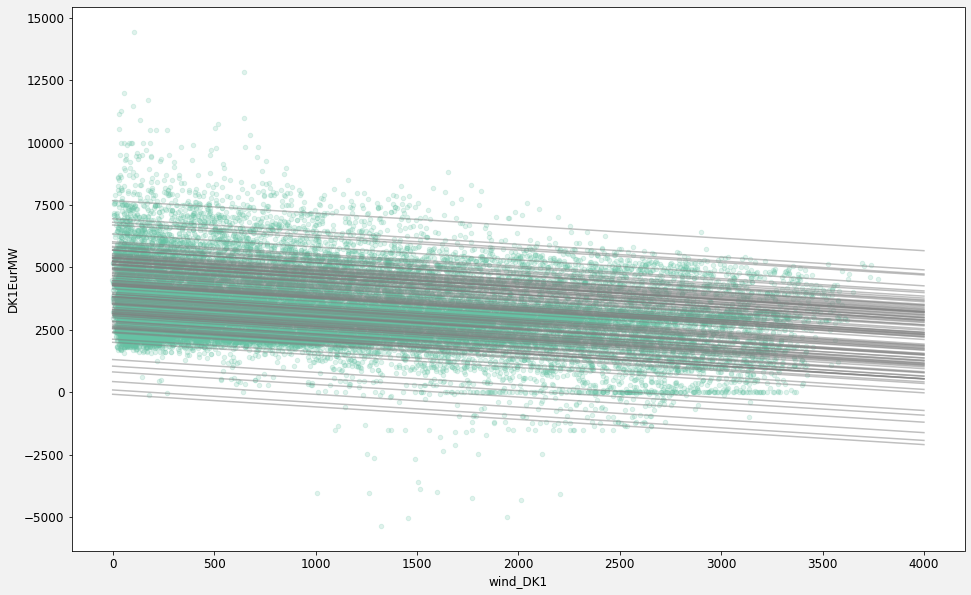

In [53]:
x_line = np.arange(0,4000,1)

fig, ax = plt.subplots()
elDF.plot.scatter(x="wind_DK1", y="DK1EurMW", ax=ax, alpha=.2)
for i, row in simsDF.iloc[:100,:].iterrows():
    y_line = row[0] + row[1]*x_line + np.random.normal(0,sigma_hat)
    ax.plot(x_line, y_line, color="grey", alpha=.5)


Now we'll use our simulations to create distributions for our expected prices with and without the investment. 
- For the no-investment scenario, we will fix the wind power variable at its mean value for simplicity. 

- For the investment scenario, we add an expected .5*400=200 MWH of wind production

In [54]:
meanWind = np.mean(elDF.wind_DK1)
meanWind #mean amount of wind 

newWind = .5*400
expectedWind = meanWind + newWind

In [55]:
simsDF["simPrices"] = simsDF.iloc[:,0] + simsDF.iloc[:,1]*meanWind + np.random.normal(0,sigma_hat, nsim)
simsDF["simPricesHighWind"] =  simsDF.iloc[:,0] + simsDF.iloc[:,1]*expectedWind + np.random.normal(0,sigma_hat, nsim)

We can now look at the histogram of the expected prices for the two scenarios

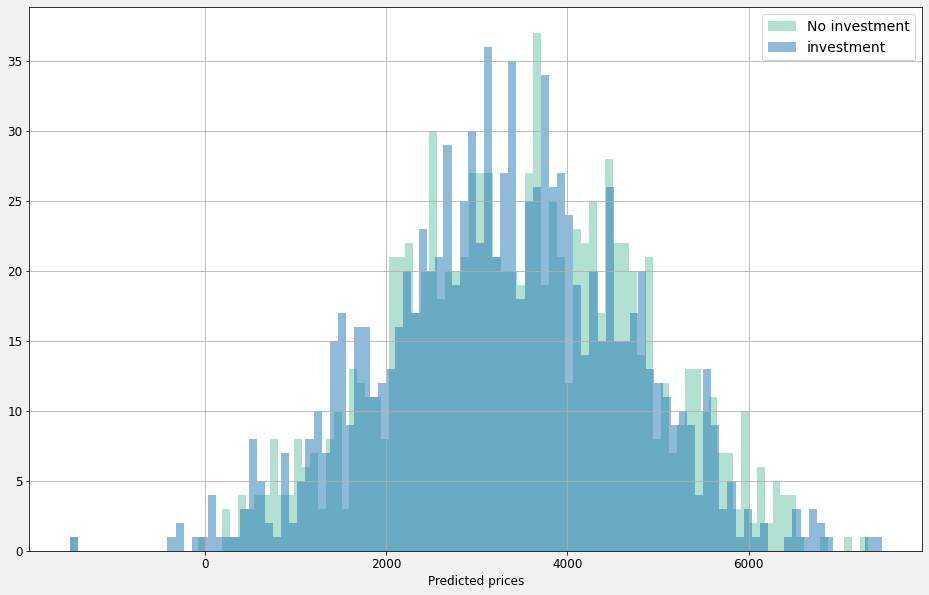

In [56]:
fig, ax = plt.subplots()
simsDF.simPrices.hist(bins=100, ax=ax, label="No investment", alpha=.5)
simsDF.simPricesHighWind.hist(bins=100, ax=ax, label="investment", alpha=.5)
ax.set_xlabel("Predicted prices")
ax.legend()

### Profit function

Now we define our profit function, which will take the simulated prices and output an expected profit for the two scenarios. 

First we define some parameters

In [22]:
InvestmentCost = 300000000 #investment cost

ExistingWindCap = 500 #How much existing wind capacity the company owns
NewWind = 400 #Size in capacity of new investment
cfWind = .5 #capacity factor of wind power
#no running/marginal cost for wind

thermalCap = 1000 #How much thermal capacity the company owns
mcThermal = 2000 #The marginal cost of the thermal capacity owned by the company
n = 1000 #1000 periods, relevant economic period to evaluate profitability. 

#only run thermal if price>mc


Now we are ready to create a profit function. 

- The function takes as input a row of the simulation data frame. 

- We calculate a variable for operating profit for both scenarios (operProfit, operProfitHighWind). The operating profit is market price times the expected amount of wind power produced. In addition, if the price is above the marginal cost of the thermal generation, then the company also gets operating profit from the difference between the market price and the marginal cost. 

- The total profit for the no-invesment scenario is simply a multiple of the operating profit times the number of periods that we consider (n=1000). 

- For the investment scenario, we must subtract the Investment cost variable. 

- The function returns a row with two new columns representing the expected profit for both scenarios

In [57]:
def profitFunction(row):
    #calculate profit without new investment
    operProfit = row.simPrices*ExistingWindCap*cfWind
    if row.simPrices > mcThermal:
        operProfit += (row.simPrices-mcThermal)*thermalCap
    row["profit"] = operProfit*n #multiply predicted operating profit by number of periods
    
    #calculate  profit with new investment
    operProfitHighWind = row.simPricesHighWind*(ExistingWindCap+newWind)*cfWind
    if row.simPricesHighWind > mcThermal:
        operProfitHighWind += (row.simPricesHighWind-mcThermal)*thermalCap
    row["profitHighWind"] = operProfitHighWind*n - InvestmentCost
    return(row)

In [58]:
newSimsDF = simsDF.apply(profitFunction, axis=1)

In [59]:
newSimsDF

0         1    simPrices  simPricesHighWind        profit  \
0    3952.788759 -0.493896  5012.876829        3142.103835  4.266096e+09   
1    3957.635557 -0.503402  3282.681386         712.747128  2.103352e+09   
2    3957.711510 -0.503402  1146.672129        2941.187571  2.866680e+08   
3    3933.209222 -0.491248  3878.110936        2215.606619  2.847639e+09   
4    3969.419491 -0.504066  1409.517923        4814.874590  3.523795e+08   
..           ...       ...          ...                ...           ...   
995  3956.120951 -0.507384  3659.349398        3047.835291  2.574187e+09   
996  3966.880672 -0.515162  4529.915873        3013.219574  3.662395e+09   
997  3989.846916 -0.523470  3797.144854        3008.258164  2.746431e+09   
998  3979.523098 -0.521184  3466.670350        3837.460831  2.333338e+09   
999  3959.795794 -0.511533  2441.090415        2737.520674  1.051363e+09   

     profitHighWind  
0      1.941840e+09  
1     -5.053851e+07  
2      1.670603e+09  
3      6.910689e+08  
4      4.200081e+09  
..              ...  
995    1.814578e+09  
996    1.767846e+09  
997    1.761149e+09  
998    2.880572e+09  
999    1.395653e+09  

[1000 rows x 6 columns]

We can now look at the distributions of potential profit scenarios

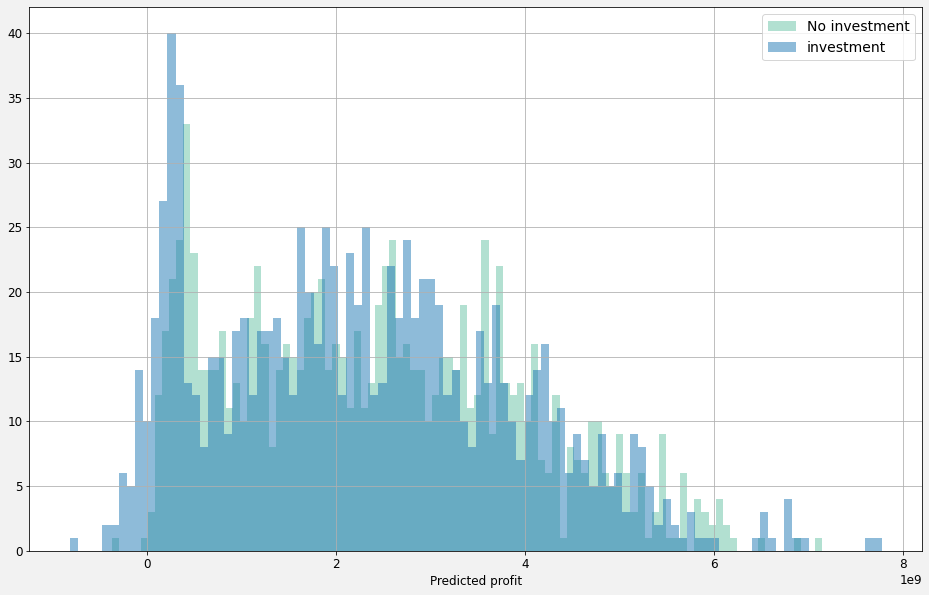

In [60]:
fig, ax = plt.subplots()
newSimsDF.profit.hist(bins=100, ax=ax, label="No investment", alpha=.5)
newSimsDF.profitHighWind.hist(bins=100, ax=ax, label="investment",alpha=.5)
ax.set_xlabel("Predicted profit")
ax.legend()

### Decision rule

Now that we have a distribution of possible profits for the two scenarios, we need to devise a criteria for making our decision. 

A straight-forward criteria would be to compare the expectation (aka mean) profit, and see which is higher. 

In [61]:
expectedProfit = newSimsDF.profit.mean()
expectedProfitHighWind = newSimsDF.profitHighWind.mean()

In [62]:
print("Expected Profit, no investment", expectedProfit)
print("Proift, investment",expectedProfitHighWind)


Expected Profit, no investment 2436272596.907039
Proift, investment 2286089024.467252


In [63]:
expectedProfitHighWind>expectedProfit

False

Under this rule we would not make the investment. But this is by no means the only viable decision rule. We could, for example, also look at which decision will lead to smallest probability of loss. 

In [64]:
nLoss  = np.sum(newSimsDF.profit<0)/nsim
nLossHighWind = np.sum(newSimsDF.profitHighWind<0)/nsim
print("Probability of loss, no investment", nLoss*100)
print("Probability of loss, investment", nLossHighWind*100)

Probability of loss, no investment 0.2
Probability of loss, investment 3.4000000000000004


Here the probability of a loss is higher if we invest

### Is the wind park in itself profitable?

Now imagine a scenario where an independent power producer wanted to come into the market and invest in the wind park. Then we could analyse the profitability of the wind park itself, without taking into account the effect on the other generators. 

We do this below

Text(0, 0.5, 'Net profit of wind park independently')

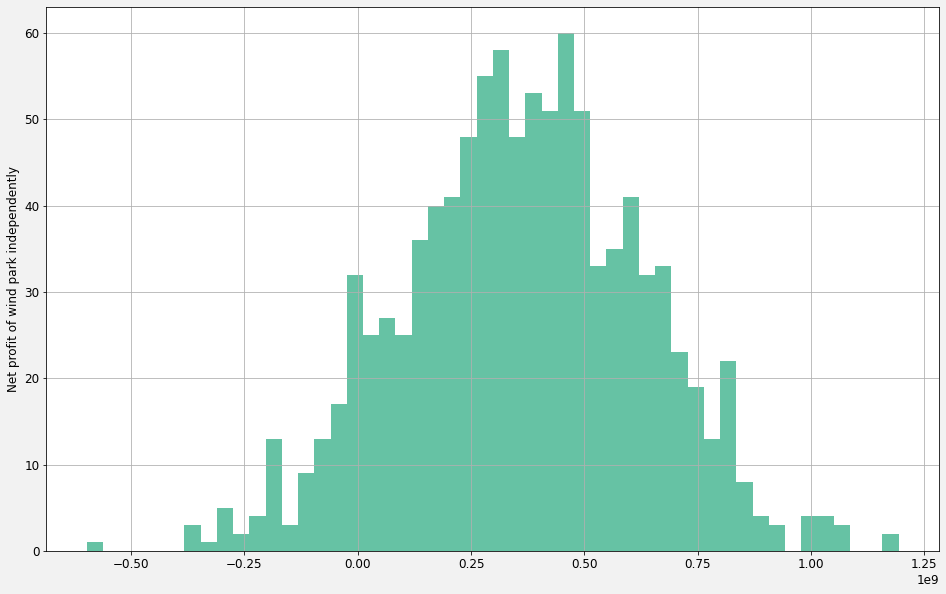

In [65]:
windParkNetProfits = newSimsDF.simPricesHighWind*NewWind*cfWind*n-InvestmentCost
fig, ax = plt.subplots()
windParkNetProfits.hist(bins=50, ax=ax)
ax.set_ylabel("Net profit of wind park independently")

# PYMC3 (optional)

Using R, we could follow the ROS book in using some relatively easy-to-use packages that will provide true Bayesian calculation of regression estimates and uncertainty. The simulation methodology used is called Markov-Chain Monte Carlo. The details are beyond the scope of this course. But we call still make use of tools for Bayesian analysis using MCMC in Python, even though the tools are not quite as easy-to-use as the packages available in R. 

The package for Bayesian analysis and regression using MCMC in Python is called [PYMC3](https://docs.pymc.io)

### A technical warning

PyMC3, like other MCMC simulation tools, makes use of a C++ interpreter to run code and models. This means there are system requirements to have a C++ interpreter installed on your PC/MAC and correctly set-up. My experience is that this can be a source of many technical problems, which can be difficult to resolve. 

We'll go through some installation instructions, but if you can't get PYMC3 installed and working, I might suggest simply skipping this portion of the lab. There is no expectation to include Bayesian analysis with MCMC simulation in a final project. An alternative would be to use the relatively easy-to-use Bayesian tools from ROS, which are pre-compiled and thus do not require a C++ compiler

### Installing PYMC3

We'll follow the [instructions on the PyMC3 website for installing](https://www.pymc.io/projects/docs/en/stable/installation.html).

    
The above assumes you have installed *anaconda*, which we should have if you have been following the course. 
    
The *environment* is basically a workspace with different configurations of python. This means that every time you want to use pymc3, you first need to activate the environment by writing in *conda activate pymc3_env*, or whatever you called it. And when you want to quit that environment (and go back to your standard environment) you would write in *conda deactivate*

You may also need to install Xcode (you can find it in the mac app store). Once you have installed Xcode, you may also need to install *Command Line tools*. This you can do by the following command in the terminal: 

    xcode-select --install 

### Creating a Bayesian model in PyMC3

We'll first go through the Bayesian regression model as discussed in this [tutorial](https://docs.pymc.io/en/v3/pymc-examples/examples/generalized_linear_models/GLM-linear.html) by **Thomas Wiecki** (One of the creators of PYMC3) to get a handle on using PyMC3. You should read through his post, where he also discusses some of the advantages of Bayesian analysis and gives an explanation of the steps which I will not reproduce here. 

Before we start, you may need to close your jupyter notebook and terminal. Then do the following steps: 

Open a new terminal window 

Activate your pymc3 environment by writing

    conda activate pymc3_env
    
Install the package bambi (an add-on package for PYMC3) with pip (conda doesn't seem to work)

    pip install bambi
    
You may also need to re-install jupyter notebooks for your pymc3 environment

    conda install jupyter
    
Navigate to the file where you have your notebook, then open your notebook. 


Then we *should* be ready to run the following code: 

(In case the below code does not work, one solution is to install "theanos" seperately, then install pymc3 after:)

    conda remove theano-pymc -y
    conda install -c conda-forge theano-pymc -y
    conda install pymc3

In [4]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as spt

from pymc3 import HalfCauchy, Model, Normal, glm, plot_posterior_predictive_glm, sample

print(f"Running on PyMC3 v{pm.__version__}")

Running on PyMC3 v3.11.4


In [5]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

### Toy data generation

Below a simple "fake" dataset is generated, not unlike what we have done in previous labs

In [6]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))

Here is a visualization of the data together with the "true" regression line

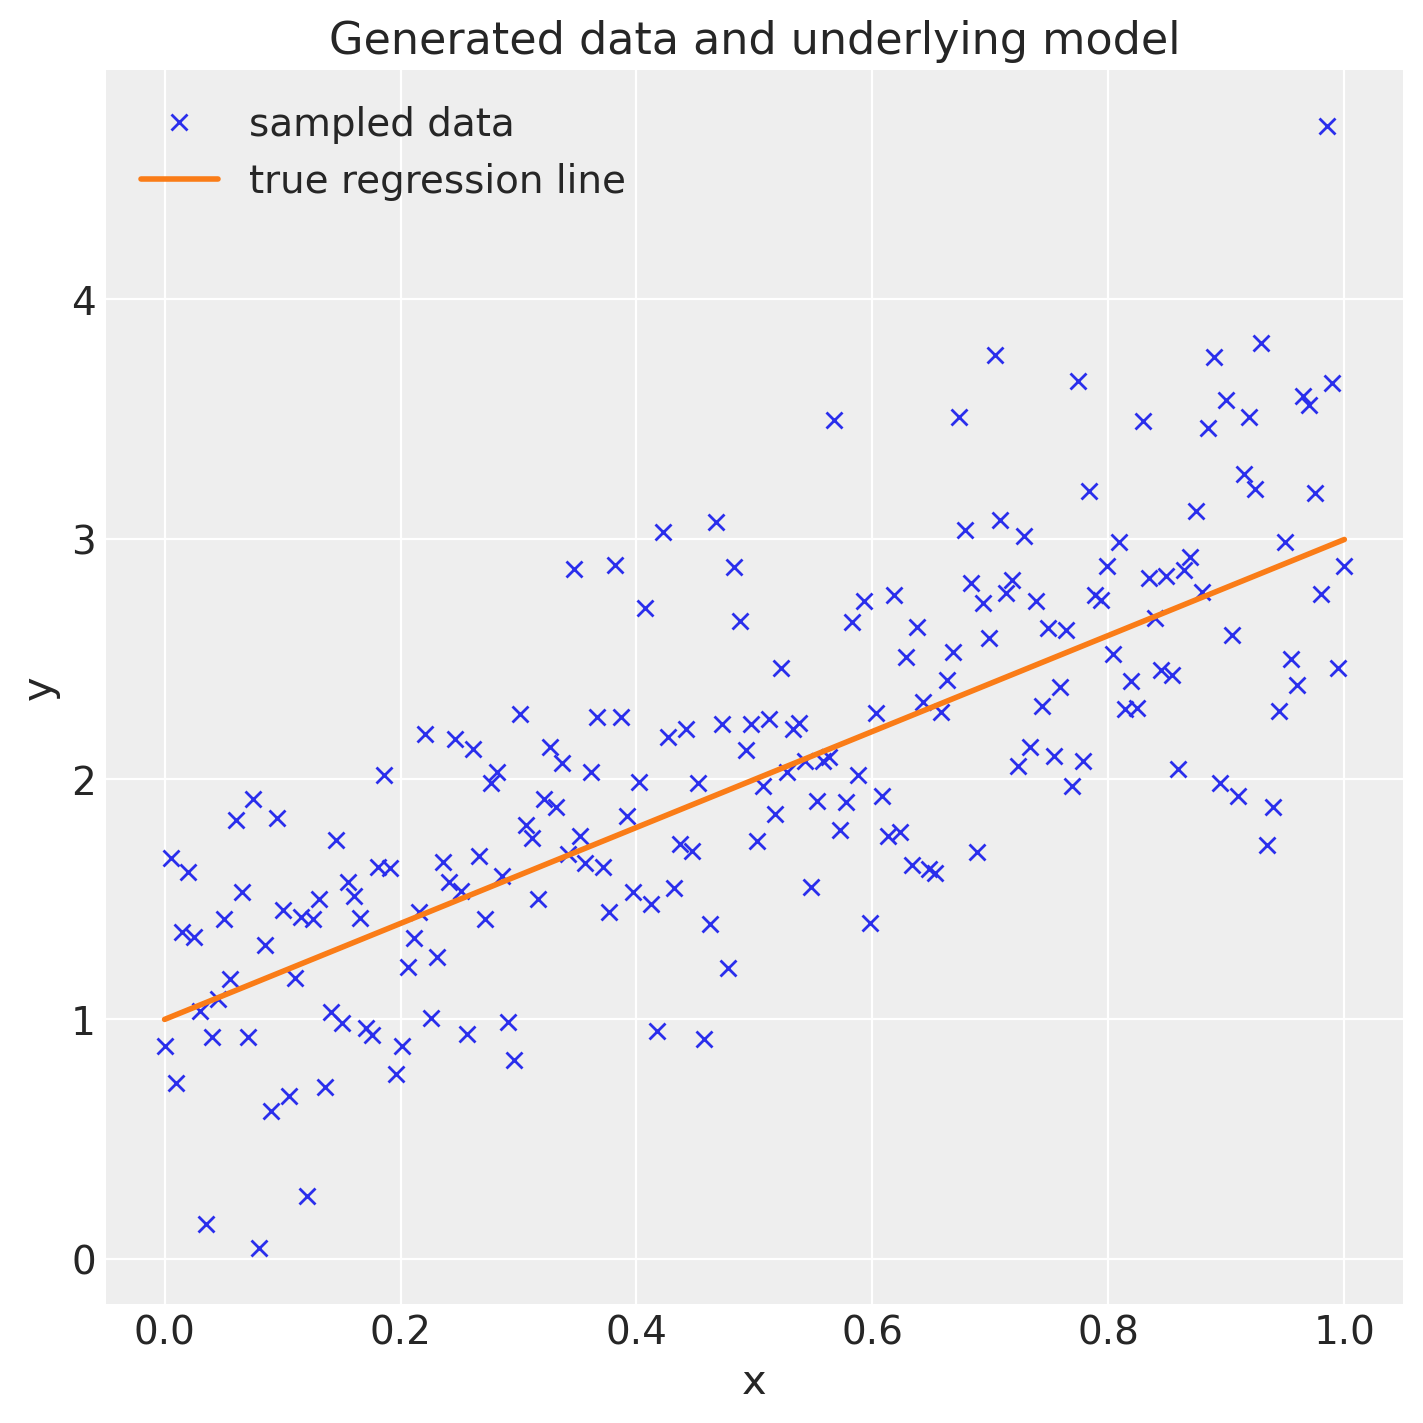

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

## Estimating the model

Below is the *standard* pymc3 setup of a bayesian model.

### Priors

It starts by defining *prior distributions* for the model: for the model uncertainty, sigma, the intercept term and the coefficient on the x term. These priors are designed to be fairly "weakly-informative" or "semi-informative", that is to say, we are not imposing much prior knowledge into the distributions, and only imposing some "regularization" - that is automatically discounting outllier data points. The bayesian estimation will probably be similar to maximum likelihood or OLS. 

### We then define the **likelihood** of the equation. 

Here we are writing that we consider the y-variable to be normally distributed with mean values equal to the regression equation: 

$$Y \sim N(\alpha + \beta x, \sigma)$$

Notice what this means: we are modelling each Y-value as having its own probability distribution, where with our typical modelling we give each Y-value a single "fitted value". 

### Sampler

Finally, we tell our MCMC algorithm (called a "sampler" in the sense that we are randomly sampling data from the probability model we have defined), to run 3000 simulations. Hopefully the below code will run for you: 

In [16]:
with Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = Normal("Intercept", 0, sigma=20)
    x_coeff = Normal("x", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + x_coeff * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = sample(3000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept, sigma]


/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 15 seconds.


### A simpler way of running Bayesian regression

The above approach is familiar to people who have worked quite a bit with bayesian modelling and is very flexible for building almost any type of Bayesian probability model. But even simple regressions like that above can be confusing if you are starting out. So there are tools built on-top of pymc3 that allow for running simple Bayesian regression models with a familiar (statsmodels, r) interface. 

Below we use the Bambi (bmb) package to run the same regression with mcmc simulation above (this is similar to the stan_glm function in ROS): 

In [17]:
model = bmb.Model("y ~ x", data)
trace = model.fit(draws=3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_sigma, x, Intercept]


/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 15 seconds.


### Output from a bayesian model. 

At a practical level, a big difference between bayesian analysis and the tools we have been using is that we are not doing a form of optimization: that is finding parameters that maximize likelihood (Maximum likelihood) or minimize squared erros (OLS).

Instead, we are setting up a probability model (prior, likelihood/data etc) and then "sampling" from the resulting posterior distribution.

So instead of getting as output single point estimates for our coefficients, we get sampled values for each coefficient. Basically, we get as output **distributions** for each parameter. 

We can use the package *arviz* (az) to plot the distributions of our three parameters (intercept, parameter on our x value and our sigma):

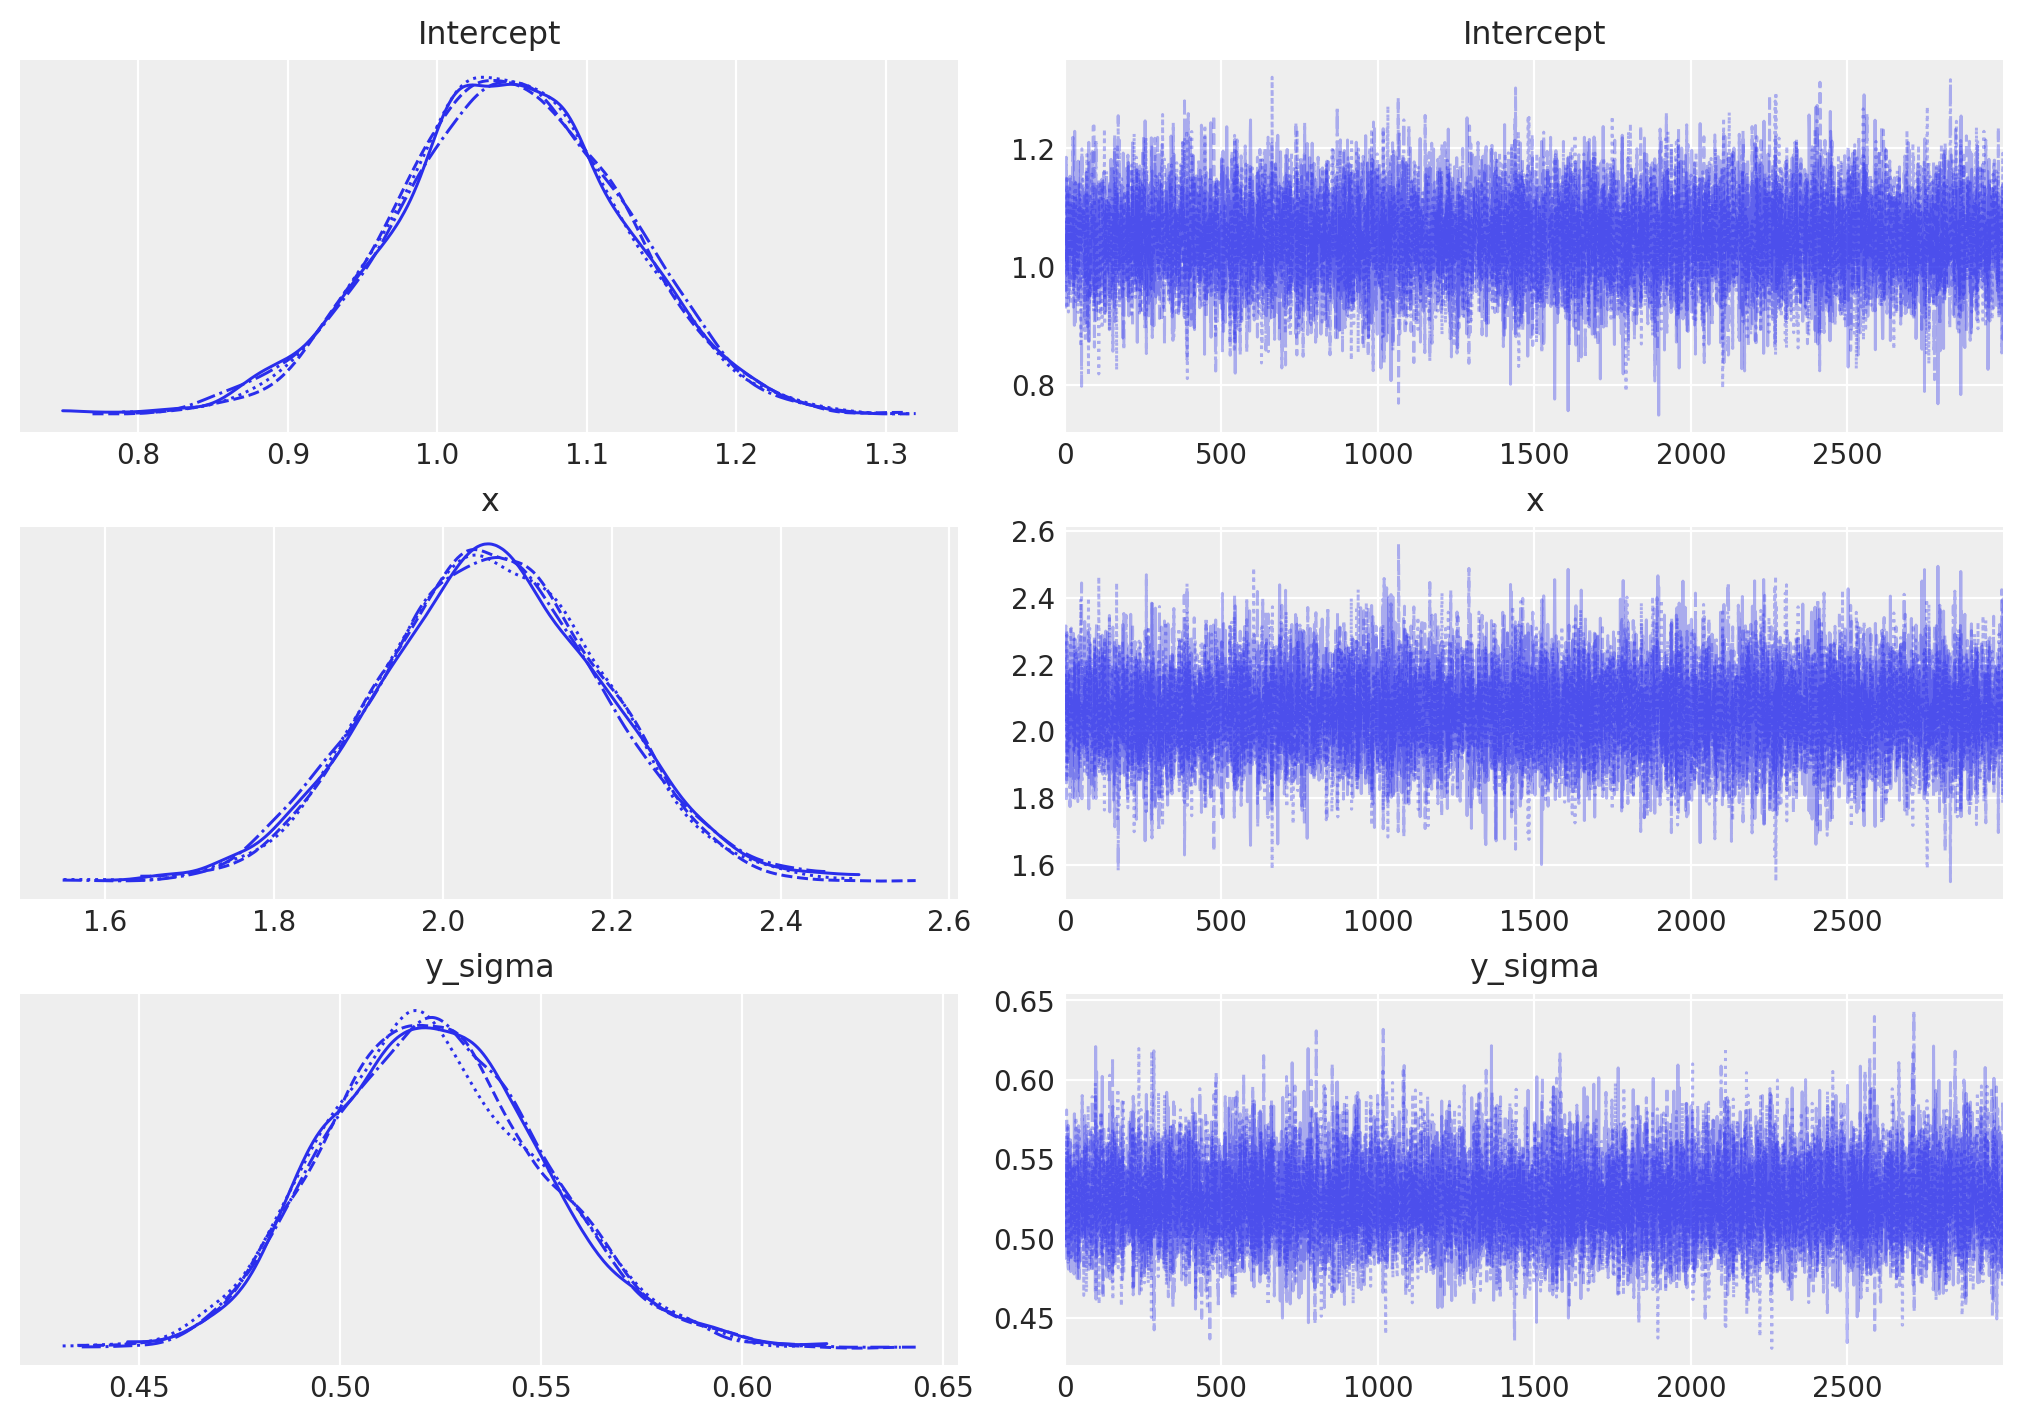

In [14]:
az.plot_trace(trace, figsize=(10, 7));


If we wanted to generate a point estimate, we could, for example take the mean value of our distribution for a given paramaeter - for example our coefficient on our x variable:

In [27]:
np.mean(trace.posterior.x)

<xarray.DataArray 'x' ()>
array(2.05995247)

And we could generate a standard error by simply calculating the standard deviation

In [29]:
np.std(trace.posterior.x)

<xarray.DataArray 'x' ()>
array(0.13115991)

We can then plot posterior predictive regression lines as we have seen in earlier labs with the pymc3 function *plot_posterior_predictive_glm*: 

/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


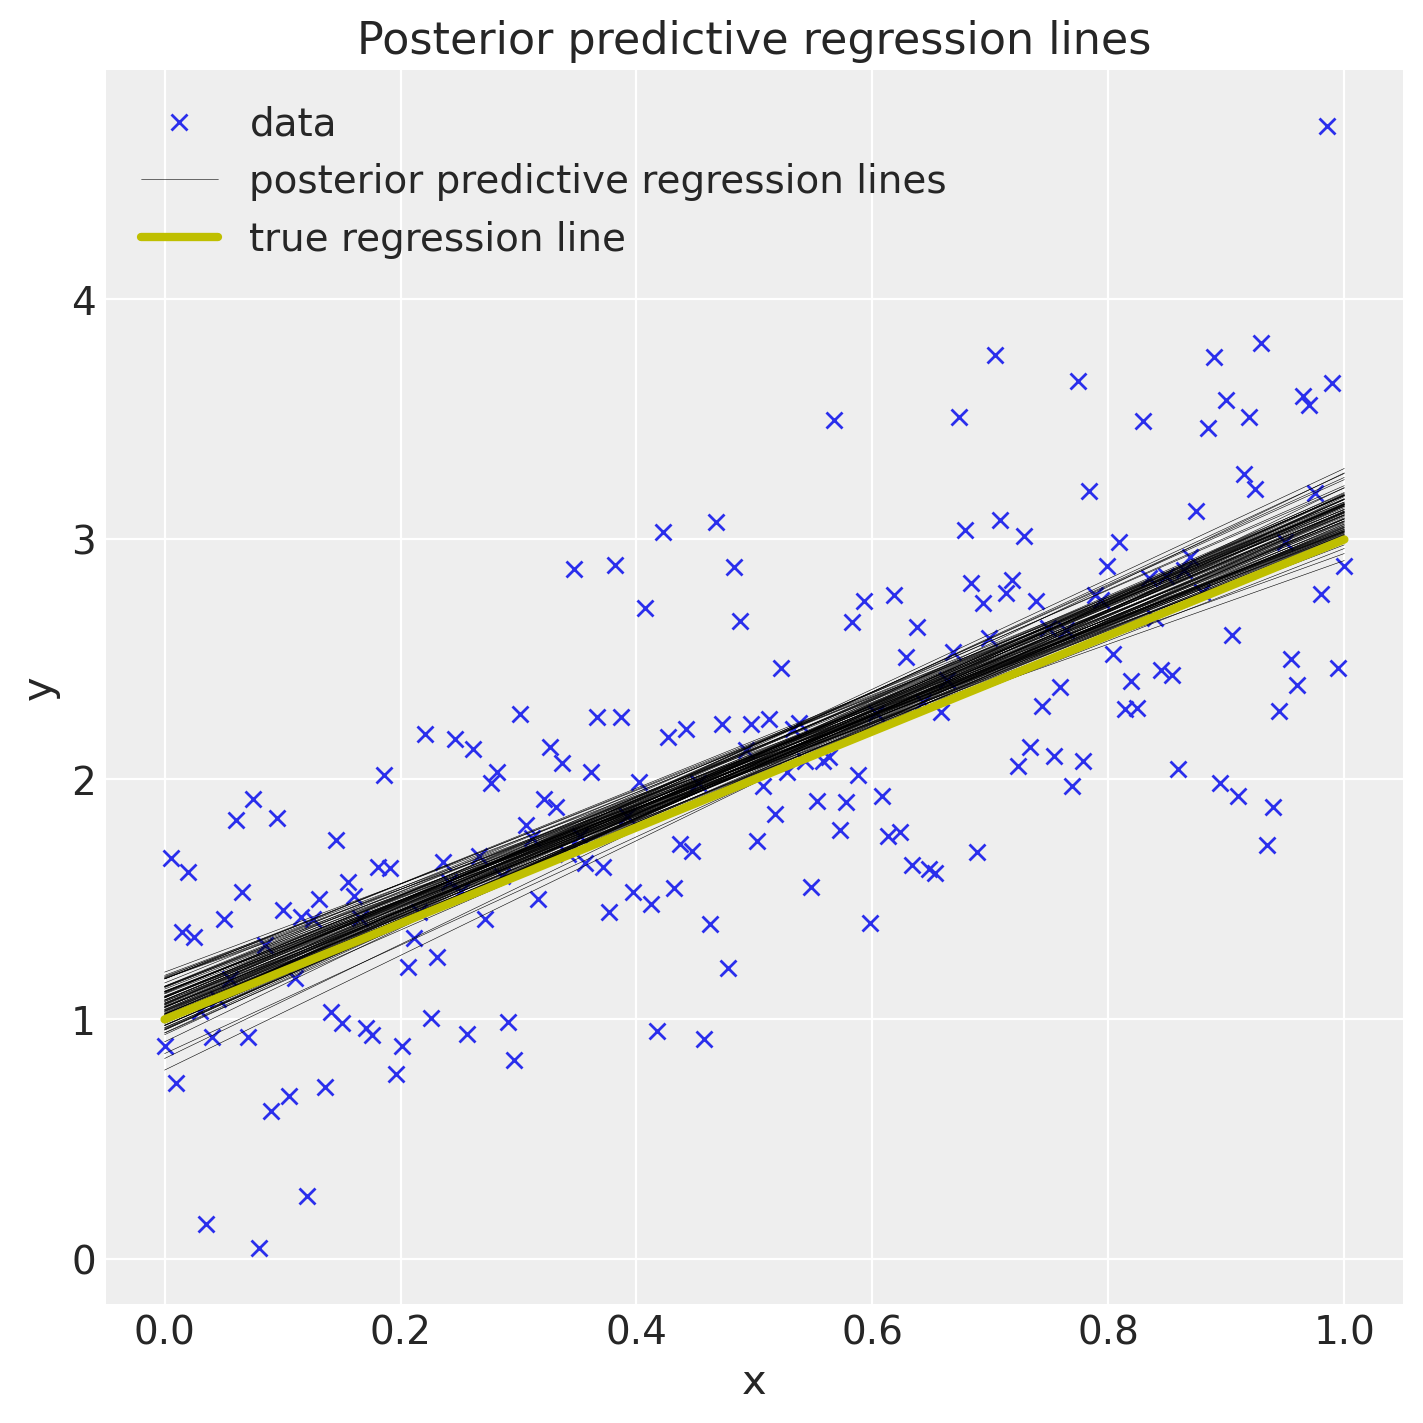

In [15]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, "x", label="data")
plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y");

### Bayesian inference: Height and income

Here we will run a regression comparing earnings and height, introduced in ROS, using Bayesian MCMC. 

We start by downloading the dataset from the ROS website

In [75]:

earnings = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")

earnings

height  weight  male     earn  earnk ethnicity  education  \
0         74   210.0     1  50000.0   50.0     White       16.0   
1         66   125.0     0  60000.0   60.0     White       16.0   
2         64   126.0     0  30000.0   30.0     White       16.0   
3         65   200.0     0  25000.0   25.0     White       17.0   
4         63   110.0     0  50000.0   50.0     Other       16.0   
...      ...     ...   ...      ...    ...       ...        ...   
1811      61   120.0     0  15000.0   15.0     White       18.0   
1812      64   130.0     0   8000.0    8.0     White       12.0   
1813      72   194.0     1  60000.0   60.0     White       12.0   
1814      63   155.0     0  15000.0   15.0     Other       14.0   
1815      68   150.0     1   6000.0    6.0     White       12.0   

      mother_education  father_education  walk  exercise  smokenow  tense  \
0                 16.0              16.0     3         3       2.0    0.0   
1                 16.0              16.0     6         5       1.0    0.0   
2                 16.0              16.0     8         1       2.0    1.0   
3                 17.0               NaN     8         1       2.0    0.0   
4                 16.0              16.0     5         6       2.0    0.0   
...                ...               ...   ...       ...       ...    ...   
1811              18.0              18.0     6         1       2.0    0.0   
1812              12.0              12.0     1         1       1.0    7.0   
1813              12.0              12.0     2         1       2.0    0.0   
1814              14.0              14.0     6         1       2.0    2.0   
1815              12.0              12.0     1         6       1.0    2.0   

      angry  age  
0       0.0   45  
1       0.0   58  
2       1.0   29  
3       0.0   57  
4       0.0   91  
...     ...  ...  
1811    0.0   82  
1812    7.0   33  
1813    0.0   50  
1814    2.0   69  
1815    2.0   27  

[1816 rows x 15 columns]

Let's start by transforming the variables in our analysis to be standardized - we subtract  the mean and divide by the standard deviation



In [76]:
earnings["earn_s"] = (earnings.earn - np.mean(earnings.earn))/np.std(earnings.earn)
earnings["height_s"] =  (earnings.height - np.mean(earnings.height))/np.std(earnings.height)


### Weakly informative analysis

We start with an analysis with weakly informative priors - that is the default of the of the *bambi* GLM routine. 

In [77]:
earnings_mod = bmb.Model("earn_s ~ height_s + male", earnings)
earnings_trace = earnings_mod.fit(draws=3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [earn_s_sigma, male, height_s, Intercept]


/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 43 seconds.


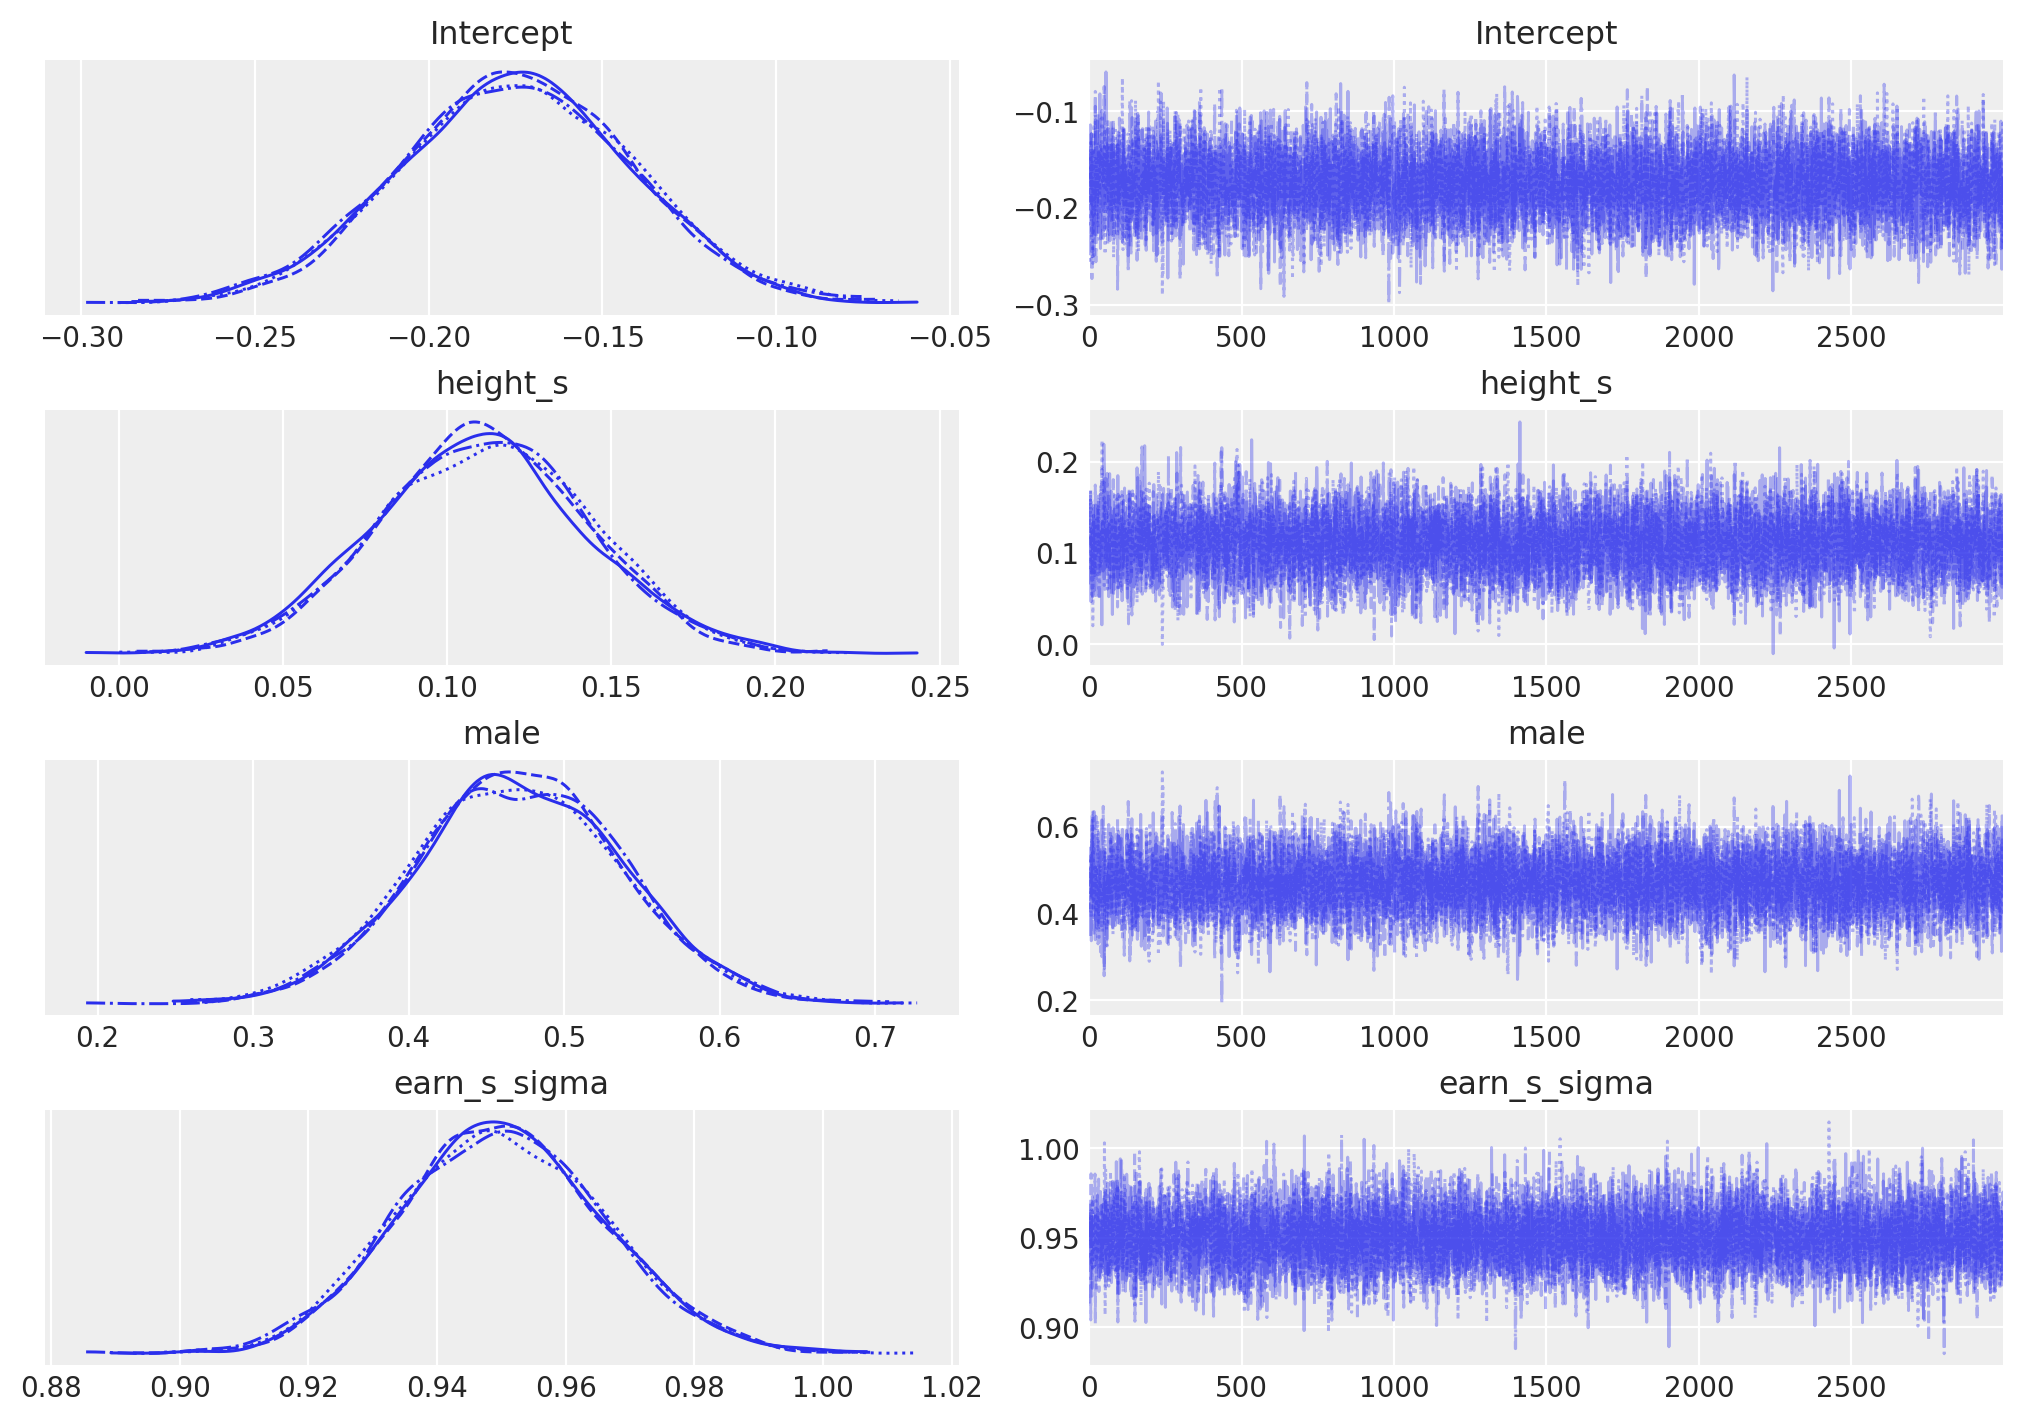

In [78]:
az.plot_trace(earnings_trace, figsize=(10, 7));

Controlling for gender, the mean coefficient value can be estimated to be: 

In [80]:
np.mean(earnings_trace.posterior.height_s)

<xarray.DataArray 'height_s' ()>
array(0.11087759)

.11, which we can interpret to mean that a 1 std change in height leads to a .11 std increase in earnings. 

We can also calculate a 95% credible interval using the hdi (highest density interval) function in arViz: 

In [81]:
az.hdi(earnings_trace.posterior.height_s,hdi_prob=.95)


<xarray.Dataset>
Dimensions:   (hdi: 2)
Coordinates:
  * hdi       (hdi) <U6 'lower' 'higher'
Data variables:
    height_s  (hdi) float64 0.0466 0.1714

We can also easily generate a summary table: 

In [83]:
az.summary(earnings_trace)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept    -0.175  0.033  -0.235   -0.111      0.000    0.000    9047.0   
height_s      0.111  0.032   0.052    0.171      0.000    0.000    7918.0   
male          0.471  0.066   0.350    0.598      0.001    0.001    7846.0   
earn_s_sigma  0.950  0.016   0.921    0.980      0.000    0.000   10798.0   

              ess_tail  r_hat  
Intercept       8352.0    1.0  
height_s        8132.0    1.0  
male            8642.0    1.0  
earn_s_sigma    8766.0    1.0

### Predicting a new value



Start by creating a new data set: 

In [119]:
x_new = pd.DataFrame({"height_s": [1,2], "male": [1,1]})

Recall that we have demeaned and rescaled our variables, so a value of 1 indicates that our new observation is a man who is 1 standard deviation taller than average and a value of 2 is someone who is 2 standard deviations taller than the mean (about at the 95 percentile). 

In [120]:
y_pred = earnings_mod.predict(earnings_trace, kind="pps", data=x_new, inplace=False)

*kind="pps" creates posterior predictive draws for a new data point, rather than inferential predictor for the mean. 

Then we can use the *plot_posterior* to look at the posterior predictive distributions of the two new data points. 

array([<AxesSubplot:title={'center':'earn_s\n0'}>,
       <AxesSubplot:title={'center':'earn_s\n1'}>], dtype=object)

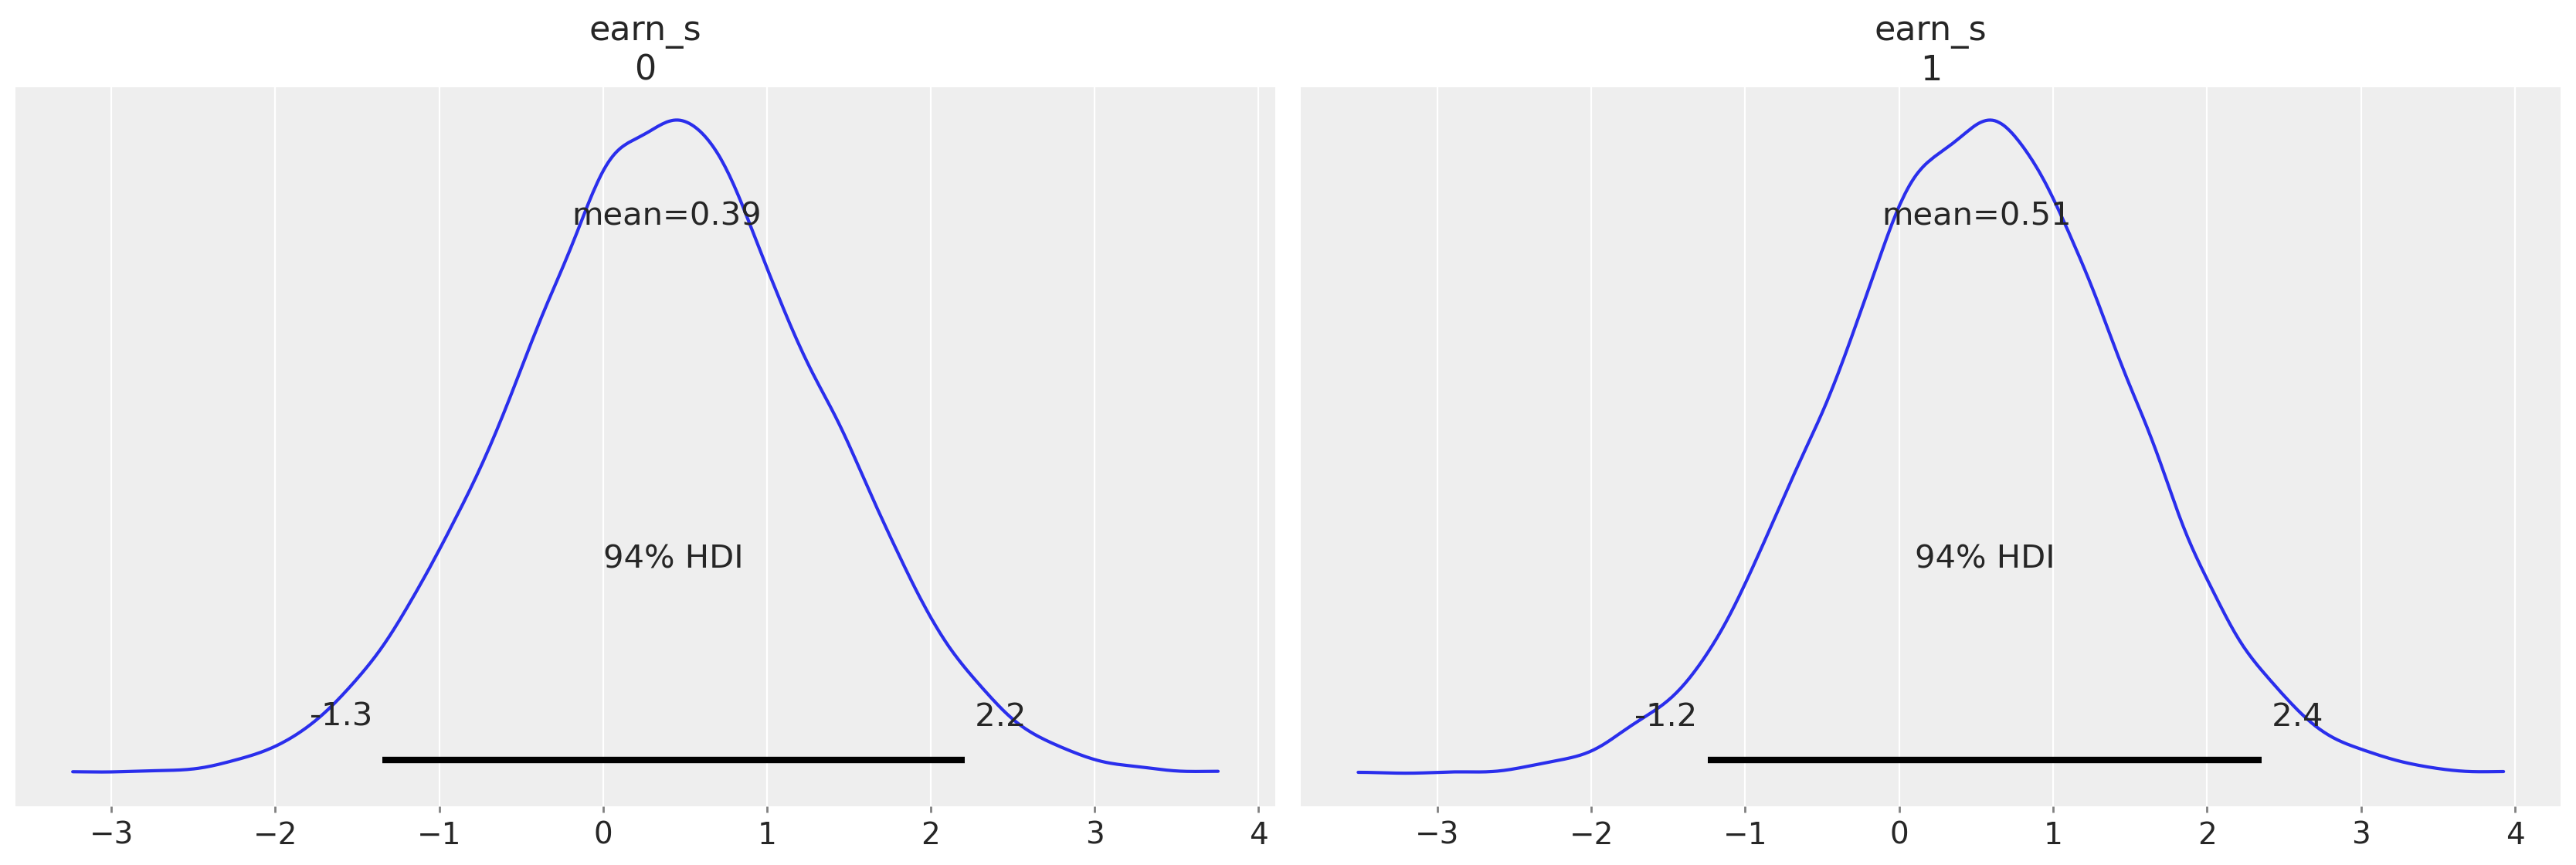

In [131]:
az.plot_posterior(y_pred.posterior_predictive)

In the above prediction, we set the parameter to *kind="pps", rather than the default *kind="mean"*, the difference between these two predictions is what ROS (9.2, p116) refers to the linear prediction or expected prediciton (mean) and the posterior prediction (pps).The main difference is the uncertainty. The uncertainty in the expected prediction is in the coefficients, while the posterior prediction will also include the model uncertainty ($$). 

We could have created the prediction manually, here for the case of a male who is 1 standard deviation taller than average: 

<AxesSubplot:title={'center':'x'}>

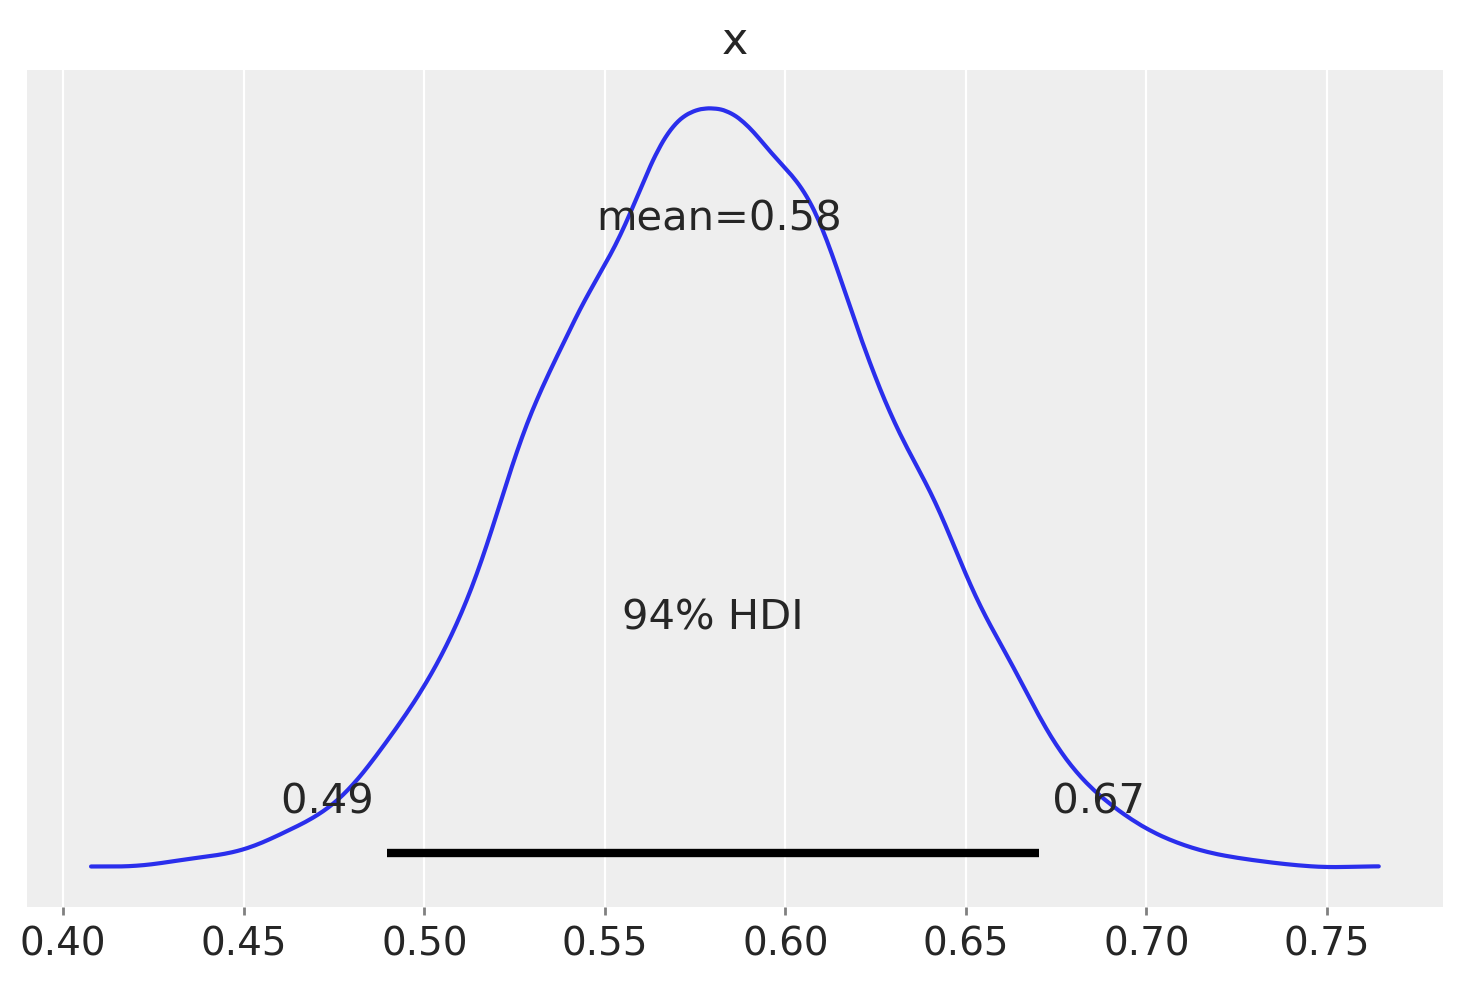

In [134]:
y_epred = earnings_trace.posterior.height_s*1 + earnings_trace.posterior.male*1
az.plot_posterior(y_epred)

<AxesSubplot:title={'center':'x'}>

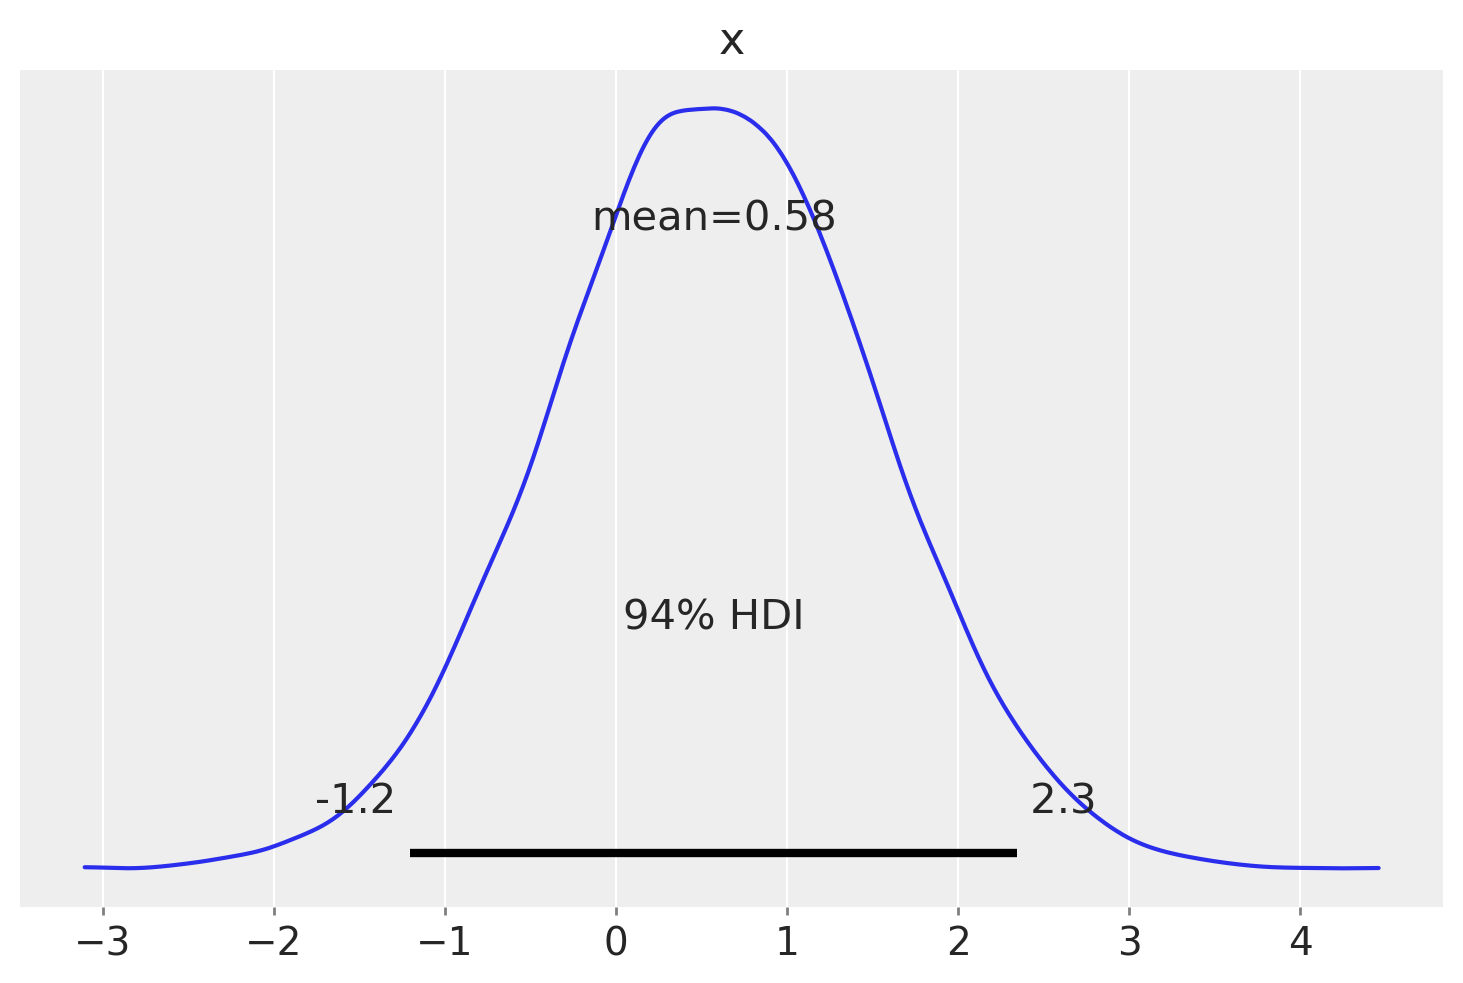

In [142]:
epsilons = spt.norm.rvs(loc=0, scale=earnings_trace.posterior.earn_s_sigma)
y_ppred = earnings_trace.posterior.height_s*1 + earnings_trace.posterior.male*1 + epsilons
az.plot_posterior(y_ppred)

Remember, since we are generating random number, the results will always be somewhat variable, but the credible interval are similar. 

### Where Bayes shines

One of the implicit (and sometimes explicit) goals of the ROS text is to introduce Bayesian methods as a relatively simple-to-use all-purpose replacement for typical statistical analysis using maximum likelihood or OLS methods, as well as replacing the probabilistic Bayesian way of thinking about statistics as a replacement for the cumbersome hypothesis testing way we are taught in introduction classes. 

In practice, for many modelling tasks, Bayesian estimation will give similar results to maximum likelihood or OLS. But there are multiple applications where Bayesian analysis works particularly well and where it would be difficult or impossible to do the same analysis with maximum likelihood or OLS estimation. We go quickly through a few of these applications: 

- **Integrate outside information through informative priors**

The most direct, and sometimes controversial, advantage of Bayesian analysis is the ability to integrate outside information through informative priors. As we have seen, it is a misconceptions that you *need* to have prior information. But if you have information, outside of the relevant dataset you are analysing, that you want to integrate into the analysis, you can do so through an informative prior. ROS discusses some examples of including informative priors in an analysis in 9.4 and 9.5. 

- **Regularization and robustness**

One of the poorly understood advantages of Bayesian analysis is to use *weakly informative* priors in order to **regularize** and create **robust** inference. This essentially means that you have priors that do not impose any strong assumptions on the data, but which will automatically discount outlier values and keep inference stable. ROS discusses this in 9.5

- **Decision analysis**

Because of the ease from which we can propogate uncertainty in an estimation or regression, Bayesian statistics are often used in decision analysis. That is, we can take the inference from, for example, a regression and then use that to make some decision. Below I give a simple example with made-up data. A more fully worked example is provided by [Thomas Wiecki](https://twiecki.io/blog/2019/01/14/supply_chain/)

- **Hierarchical Models/Multilevel models**

This is one of the main modern applications of Bayesian methods. In fact, you have probably seen a Hierachcial model in practice. The election forecasting models used by the New York Times, The Economist and 538.com (among others) are Bayesian Hierachical models. Here you have multiple sources of information over different geographic and other groupings. You have many surveys of voter intentions - in the case of the US - for different states or even counties. You also have national surveys. How do you combine all that information to make a single forecast for who will win a presidential election? You need a model that takes state-level data for each state and aggregates upward. But you also want to use information from national surveys to inform the state-level inference. You can do this with Bayesian multilevel models. ROS CH. 22 gives an introduction to multilevel models, but we do not cover it further in this course. 

- **Time Series Models and Forecasting**

Modern time series analysis are often formulated as "state-space" models - basically meaning that you analyse a time series as a process of *transitions* from various, unobserved states (like not pandemic to pandemic, or peace in europe to war in europe). The flexibility of Bayesian analysis is useful in estimating the parameters in such models. We discuss time series models at the end of this course, but we do not take an explicitly Bayesian approach. 

- **Machine learning and Artificial intelligence applications**

Bayesian methods, and bayesian thinking are common within machine learning and artificial intelligence. You may for example encounter Naive Bayesian Classification or Bayesian Networks. We leave such methods for courses specializing in machine learning and AI. 

### Decision analysis example with made-up data and PyMC3: Raising Interest Rates

We'll take a simple example with made-up data that comes from macroeconomics: the decision of whether a central bank should raise interest rates in the face of inflation. 

If you are not familiar with this question, this traditionally involves a trade-off for a central bank. Modern central banks have a "dual mandate", where they are tasked to both **maintain stable prices** (usually with some inflation target of around 2%) while maintaining "full employment", which does not mean no unemployment, but rather a *structural* unemployment rate - let' say 4%. So let's define some variables and parameters: 


- **u** actual unemployment

- **u_star = .04** structural unemployment rate - or target unemployment rate

- **$pi$** actual inflation in a period

- **pi_star = .02** inflation goal 

- **r** real interest rate (we assume this is decided by the central bank)

- **r_hat = .05** neutral rate of interest that leads, on average, to the structural unemployemnt rate. 

Then we define our **Loss Function**, or more generally what we call our **objective** function which defines our profit/loss/objective - basically whatever we want to optimize. In the case of a loss function, we enumerate a form  of damage from various macroeconomic moves. We can write it as: 

$$L = (pi - pi\_star)^2 + \lambda (u - u\_star)^2$$

We write our loss function to show that deviations from our inflation and unemployment goals increase the loss, and because of the squared function, larger deviations from the goals will have a larger weight. $\lambda$ controls the relative importance of unemployment and inflation. 

Now we create some fake data

In [153]:
u_star = .04
pi_star = .02
r_hat = .05 
T = 100 #we have 100 periods of data
r = spt.norm.rvs(.05, .03, T) # interest rates normally distributed with a mean of .05 and a standard deviation of .05
u = u_star + .5*(r - r_hat) + spt.norm.rvs(0,.02,T) 
#This says that we can expect unemployment to increase with higher real interest rates
#Notice that when r=r_hat, then, on average u=u_star (that is ignoring the random shocks)
pi = pi_star - .3*(u-u_star) + spt.norm.rvs(0,.03, T) #Phillips curve relationship. 
#Inverse relationship between inflation and unemployment

macroDF = pd.DataFrame({"t":np.arange(T), "r":r, "pi":pi, "u":u})

Then we estimate our relationship between unemployment and interest



In [172]:
unemp_mod = bmb.Model("u ~ r", macroDF)
unemp_trace = unemp_mod.fit(draws=3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [u_sigma, r, Intercept]


/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 16 seconds.


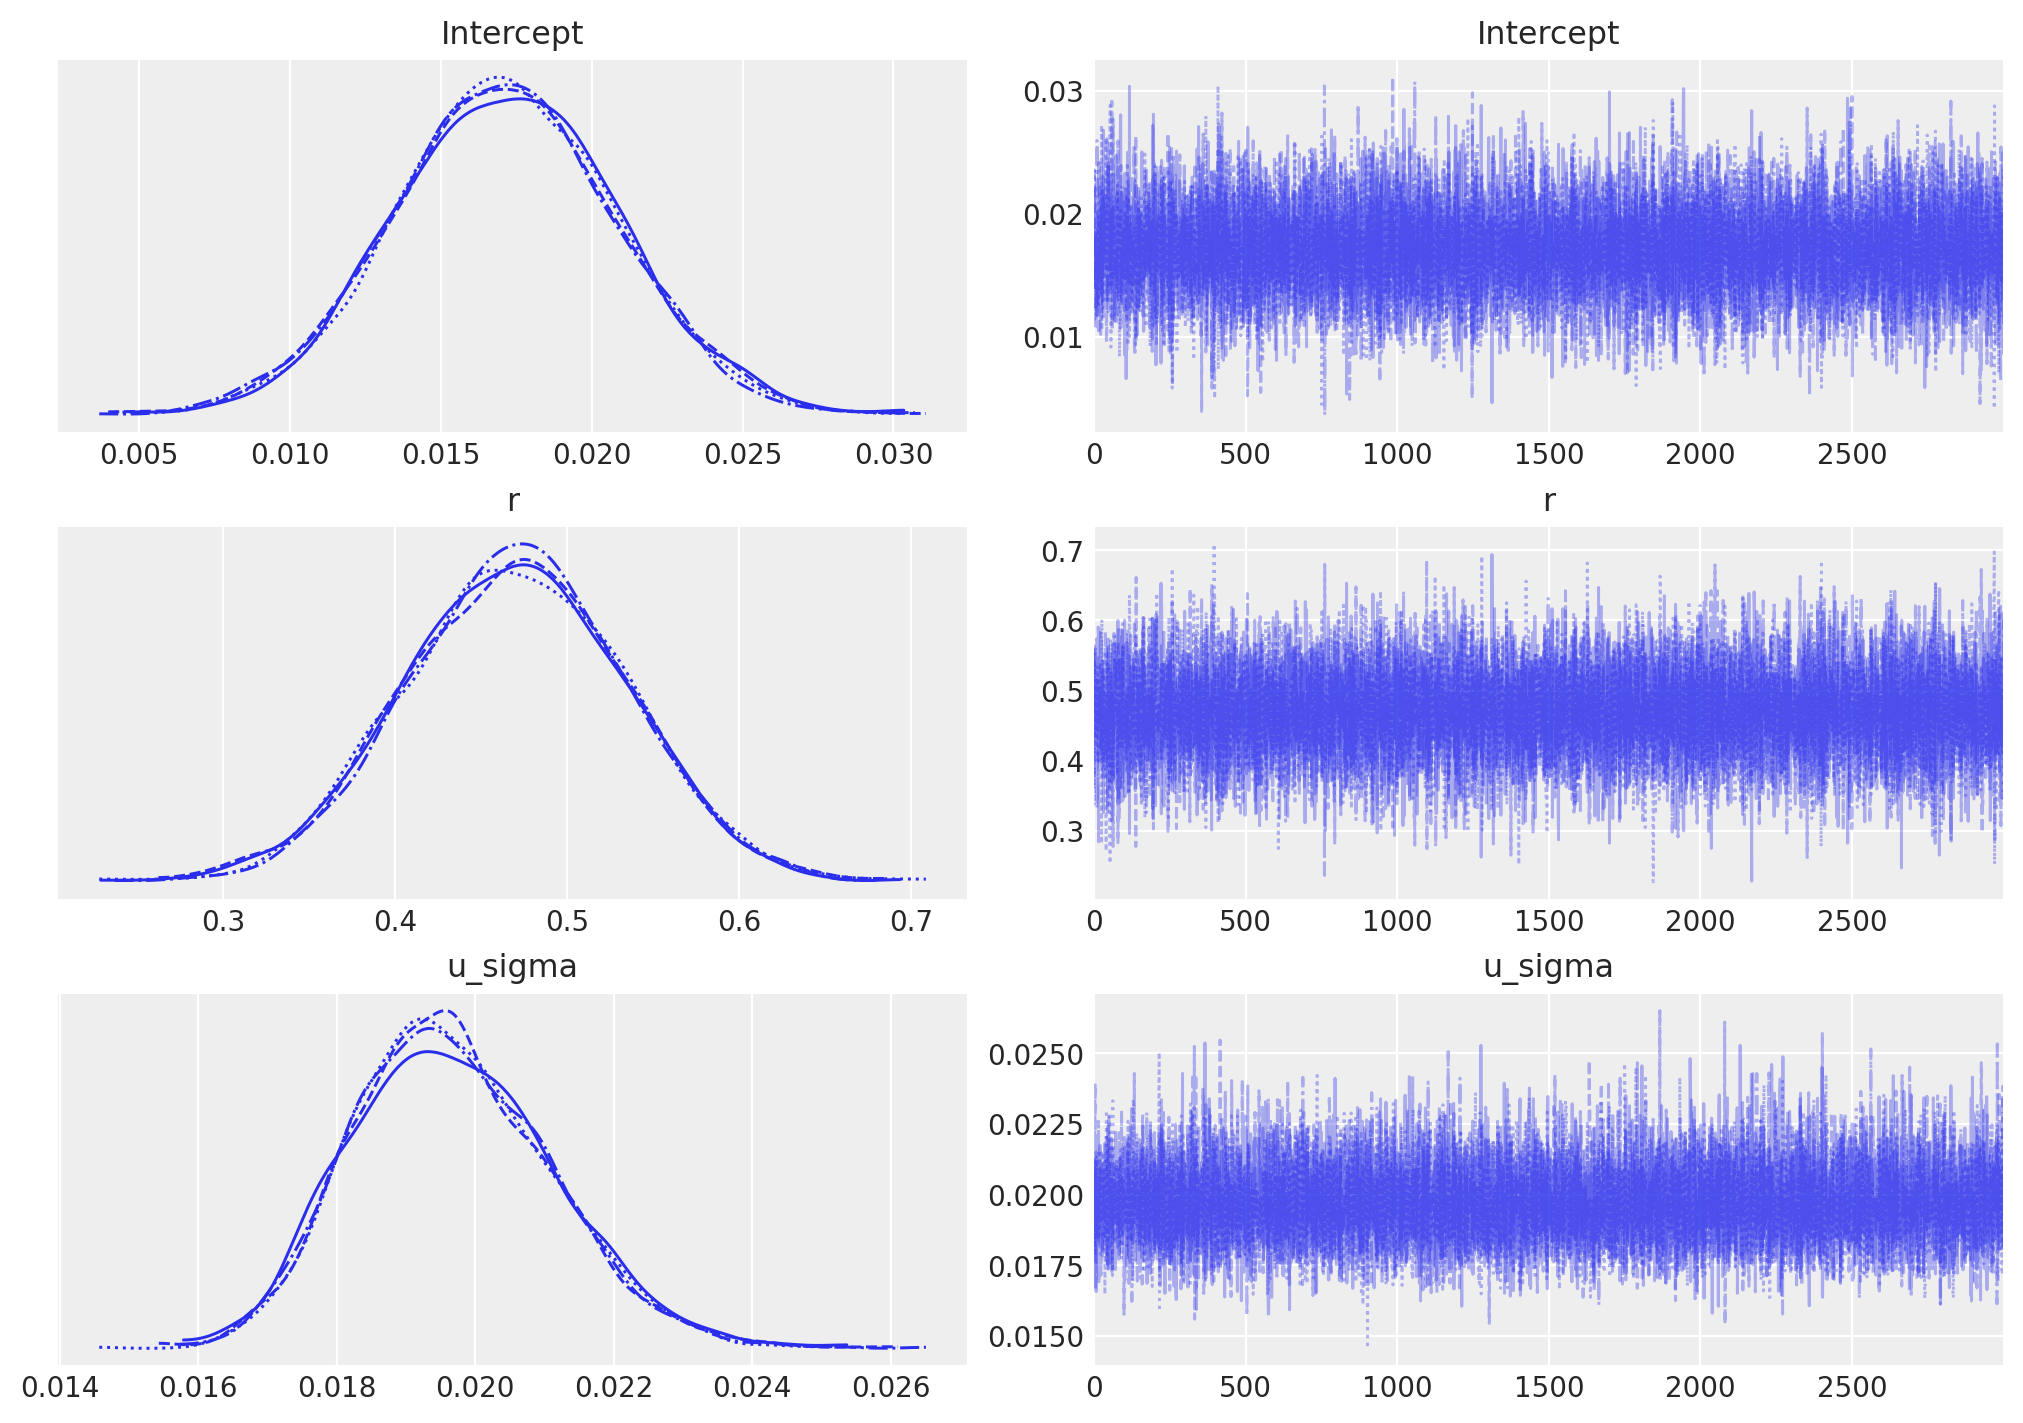

In [159]:
az.plot_trace(unemp_trace, figsize=(10, 7));

And our Phillips Curve estimation

In [158]:
pc_mod = bmb.Model("pi ~ u", macroDF)
pc_trace = pc_mod.fit(draws=3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pi_sigma, u, Intercept]


/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 16 seconds.


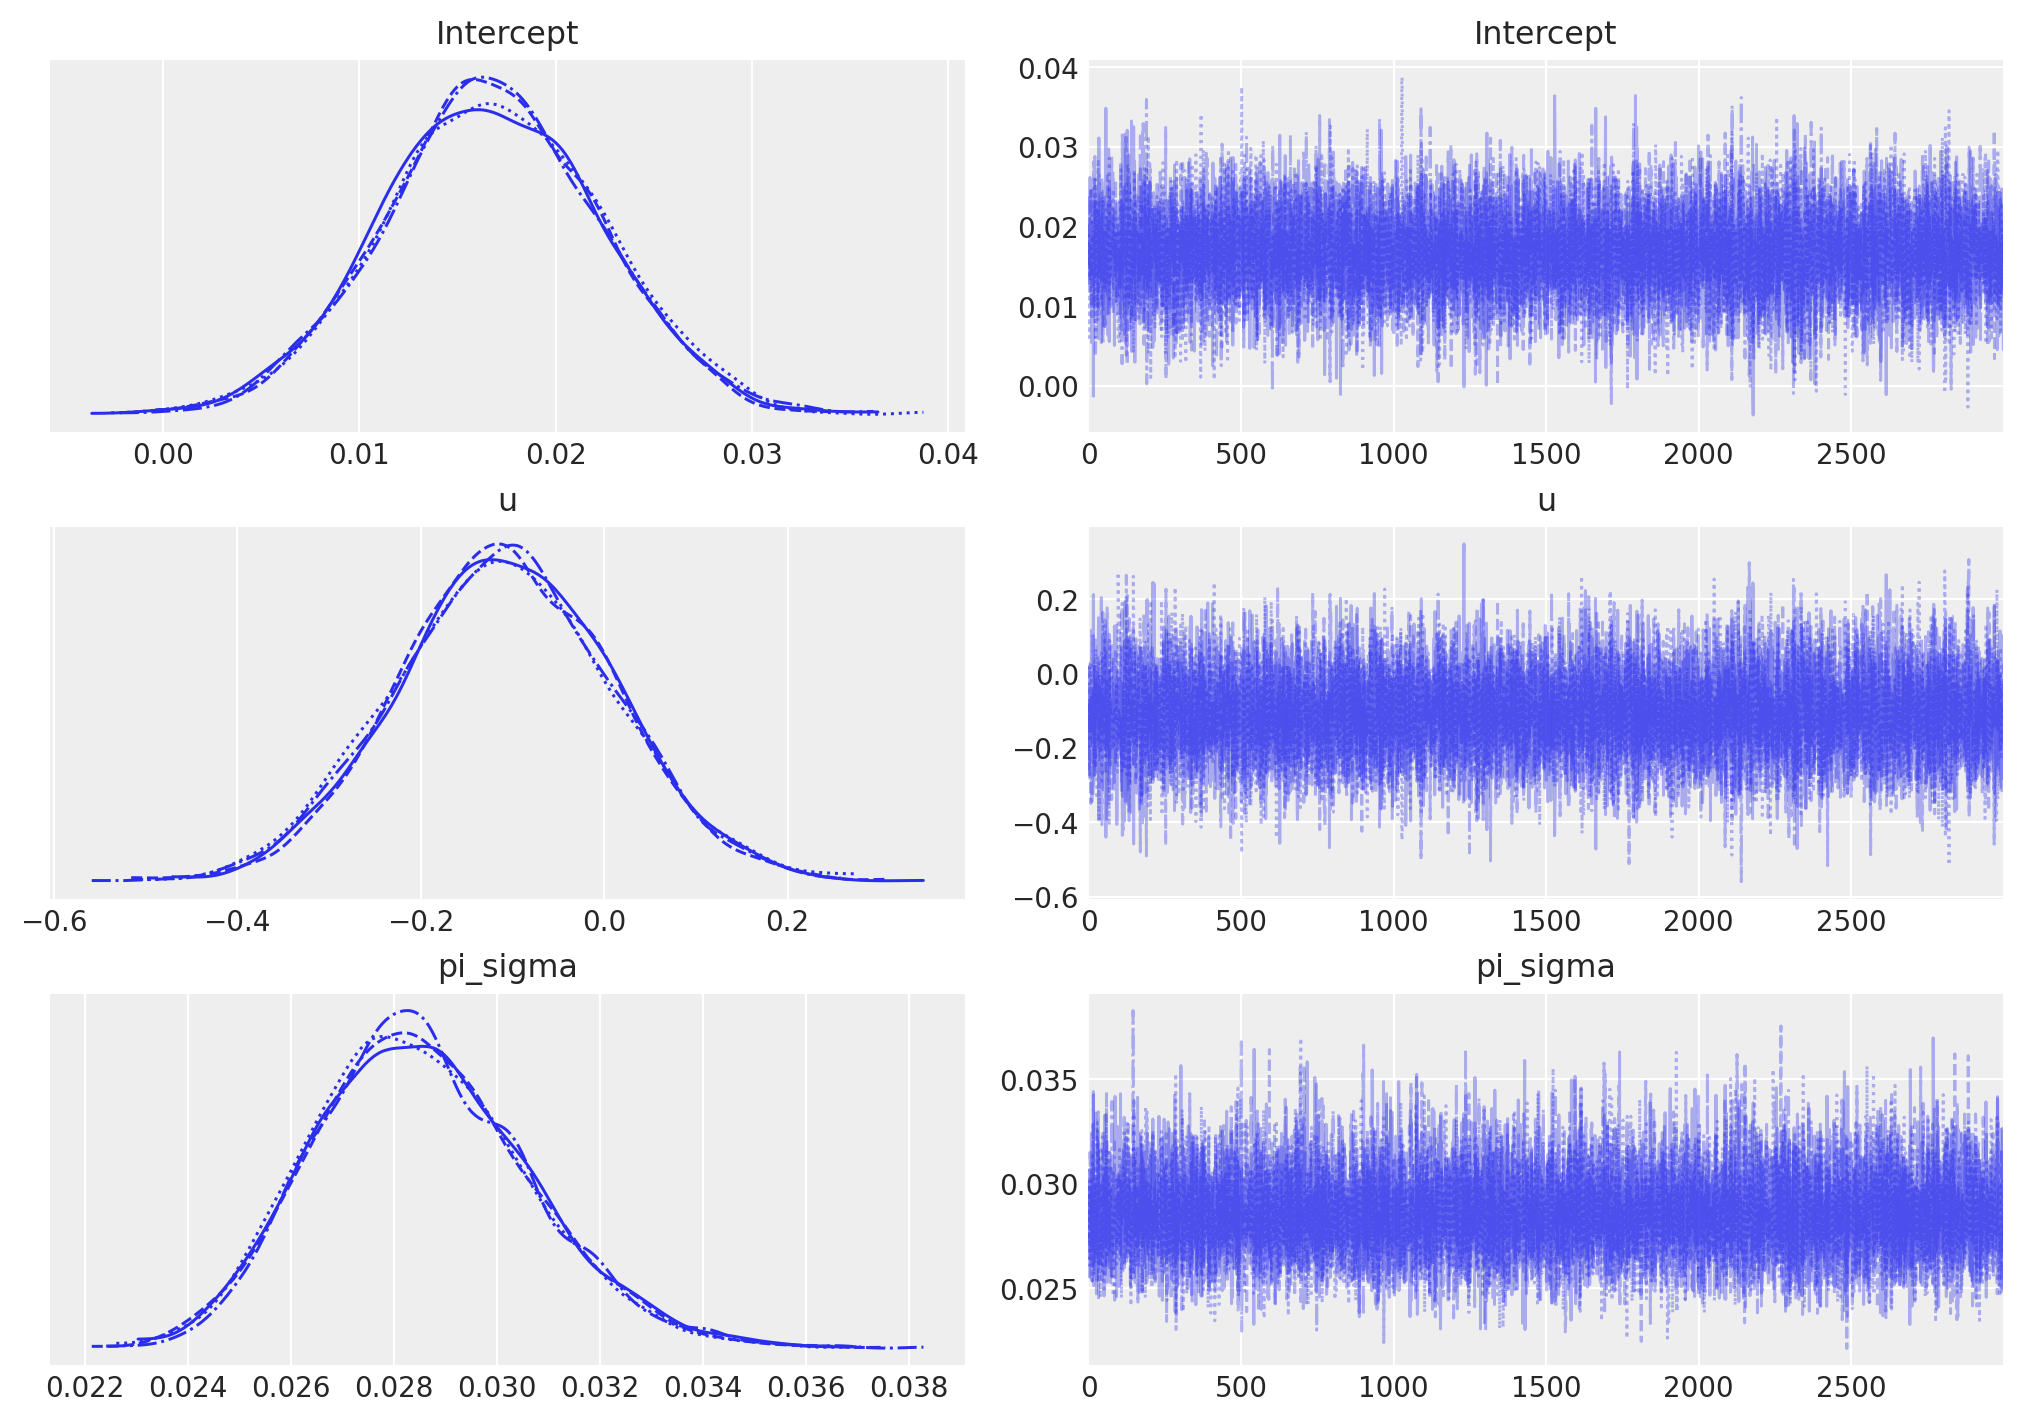

In [160]:
az.plot_trace(pc_trace, figsize=(10, 7));

Now here is the central bank's decision. Initially, we are at a equilibrium situation with r=.05, u=.04 and pi=.02. 

Then we get an inflation shock, so that pi = .04 (as has recently happened), but where unemployment remains at its structural level of .04. We then have a trade-off. 

- Raising interest rates will reduce inflation, but at the cost of increasing unemployment

- Not raising interest rates will keep unemployment at its current level, but at the cost of too high inflation.

To be concrete, let's say that the choice is between raising rates by 1 percentage point or keeping the rate where it is. 

In [174]:
#scenario one: 
raiseScenario = pd.DataFrame({"r":[.06]})
constScenario = pd.DataFrame({"r":[.05]})

u_pred_raise = unemp_mod.predict(unemp_trace, kind="pps", data=raiseScenario, inplace=False).posterior_predictive
u_pred_const = unemp_mod.predict(unemp_trace, kind="pps", data=constScenario, inplace=False).posterior_predictive

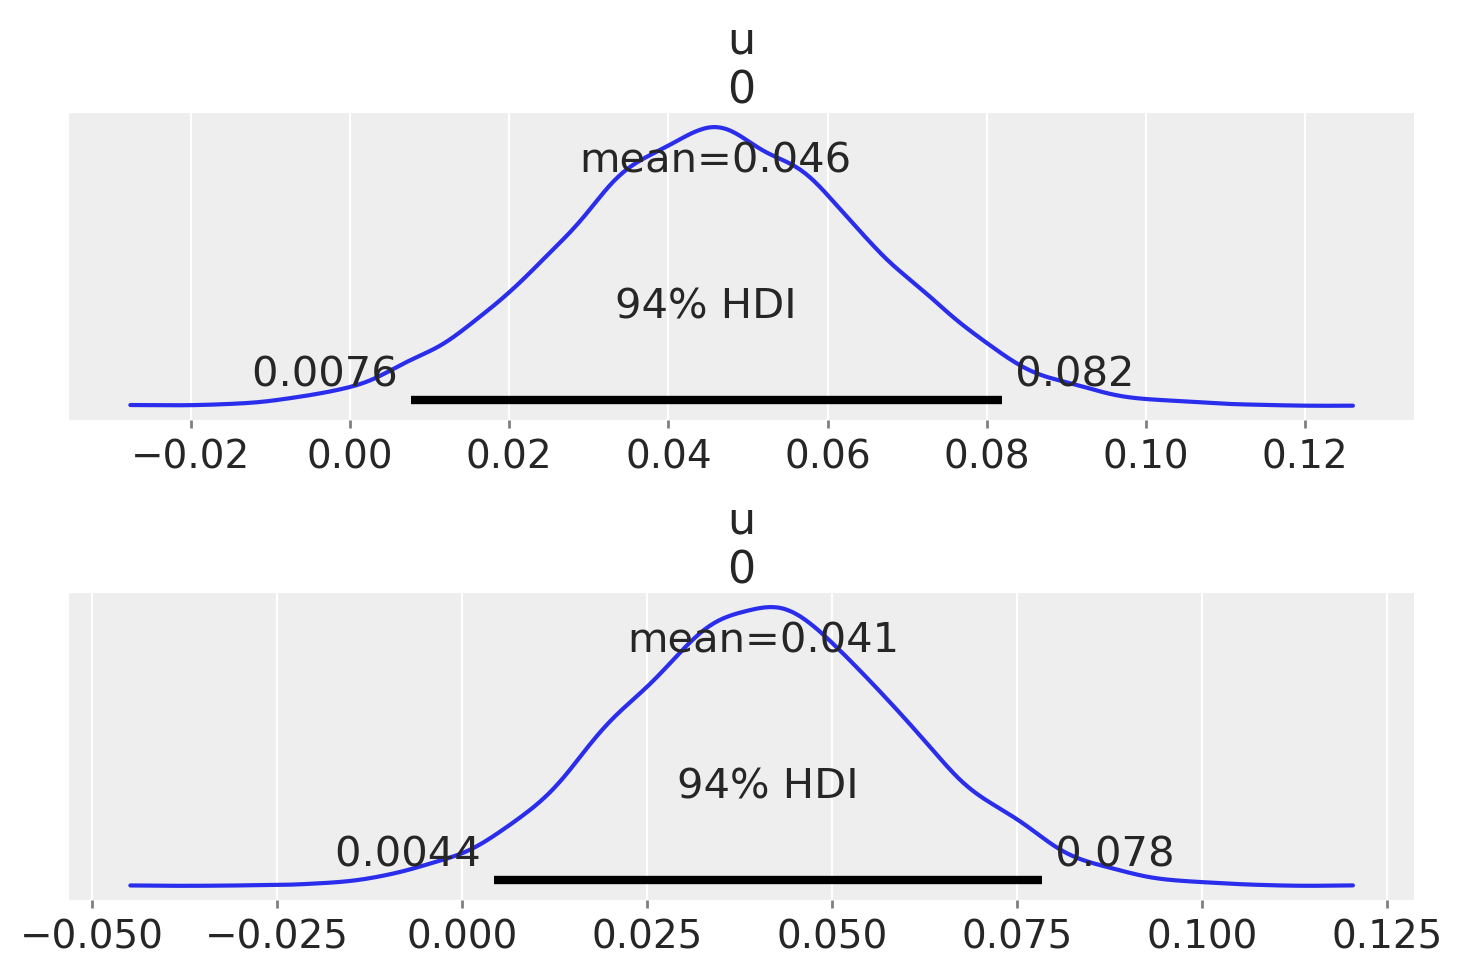

In [175]:
fig, ax = plt.subplots(2)
az.plot_posterior(u_pred_raise, ax=ax[0])
az.plot_posterior(u_pred_const, ax=ax[1])
plt.show()

array([0.07531888, 0.0337123 , 0.00300949, ..., 0.03603905, 0.02976601,
       0.03205522])

In [189]:
u_new_raise = u_pred_raise.u.values.flatten()
u_df_raise = pd.DataFrame({"u":u_new_raise})

u_new_const = u_pred_const.u.values.flatten()
u_df_const = pd.DataFrame({"u":u_new_const})

In [190]:
pi_pred_raise = pc_mod.predict(pc_trace, kind="pps", data=u_df_raise, inplace=False).posterior_predictive
pi_pred_const = pc_mod.predict(pc_trace, kind="pps", data=u_df_const, inplace=False).posterior_predictive



/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/plots/plot_utils.py:490: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (12000) in plot_posterior, generating only 40 plots
  warnings.warn(
/Users/johannesmauritzen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/plots/plot_utils.py:490: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (12000) in plot_posterior, generating only 40 plots
  warnings.warn(


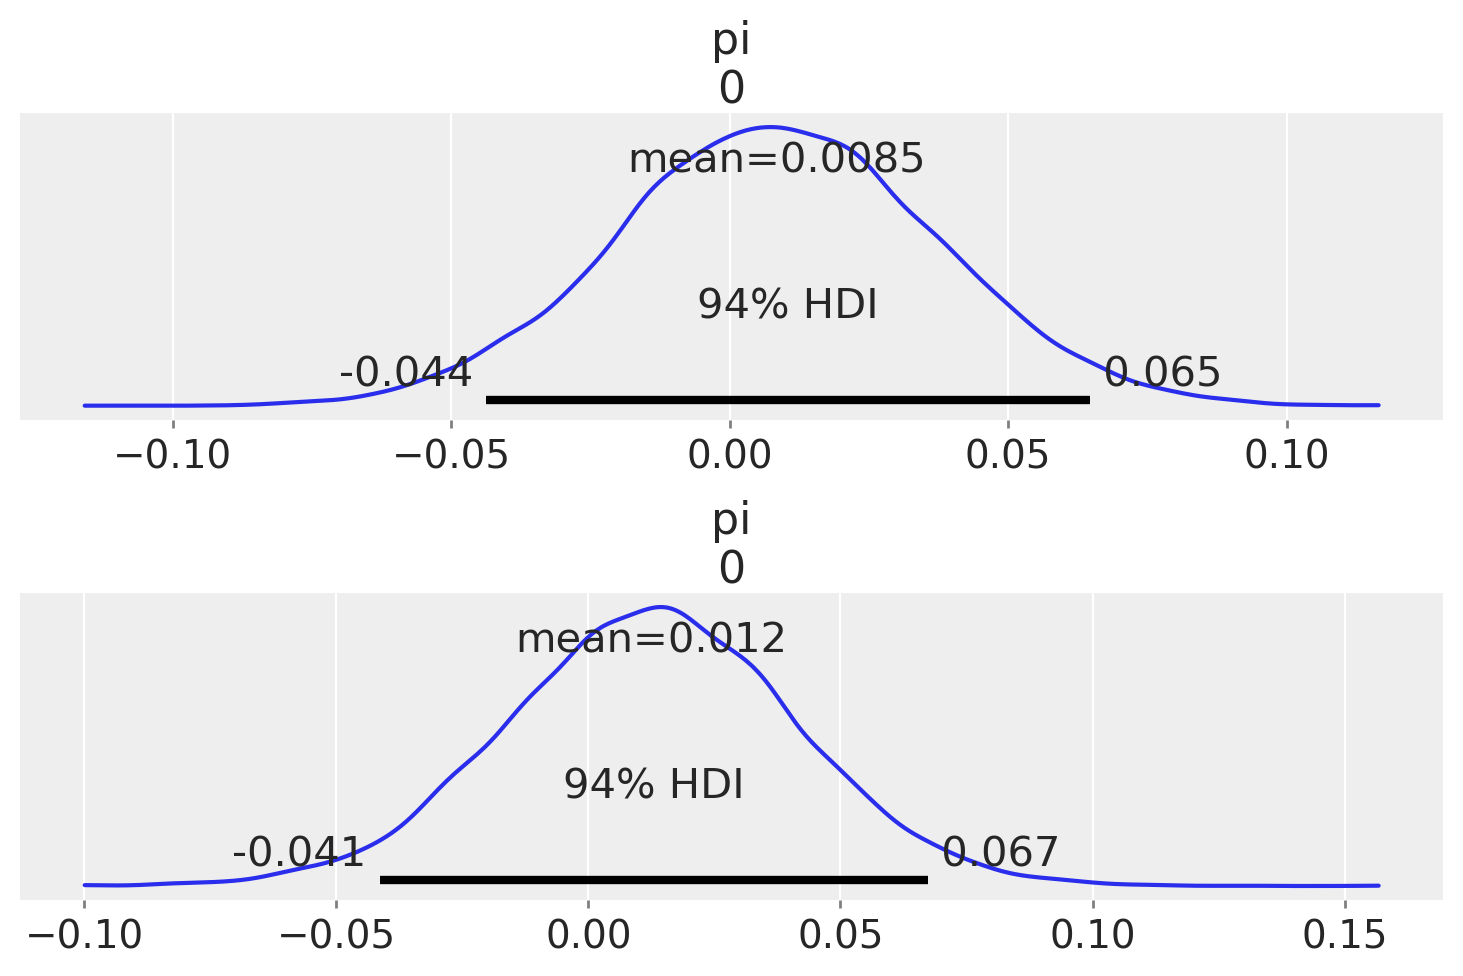

In [206]:
fig, ax = plt.subplots(2)
az.plot_posterior(pi_pred_raise, ax=ax[0])
az.plot_posterior(pi_pred_const, ax=ax[1])
plt.show()

In [216]:
def lossFunction(u, pi, lmbd = 1):
    return((u-u_star)**2 + lmbd*(pi-pi_star)**2)


In [208]:
pi_new_raise = pi_pred_raise.pi.values.flatten()

pi_new_raise = np.random.choice(pi_new_raise, 12000) # random sampling of 12000 from the array

In [209]:
pi_new_const = pi_pred_const.pi.values.flatten()

pi_new_const = np.random.choice(pi_new_raise, 12000)

In [217]:

loss_raise = lossFunction(u_new_raise, pi_new_raise)
loss_const = lossFunction(u_new_const, pi_new_const)

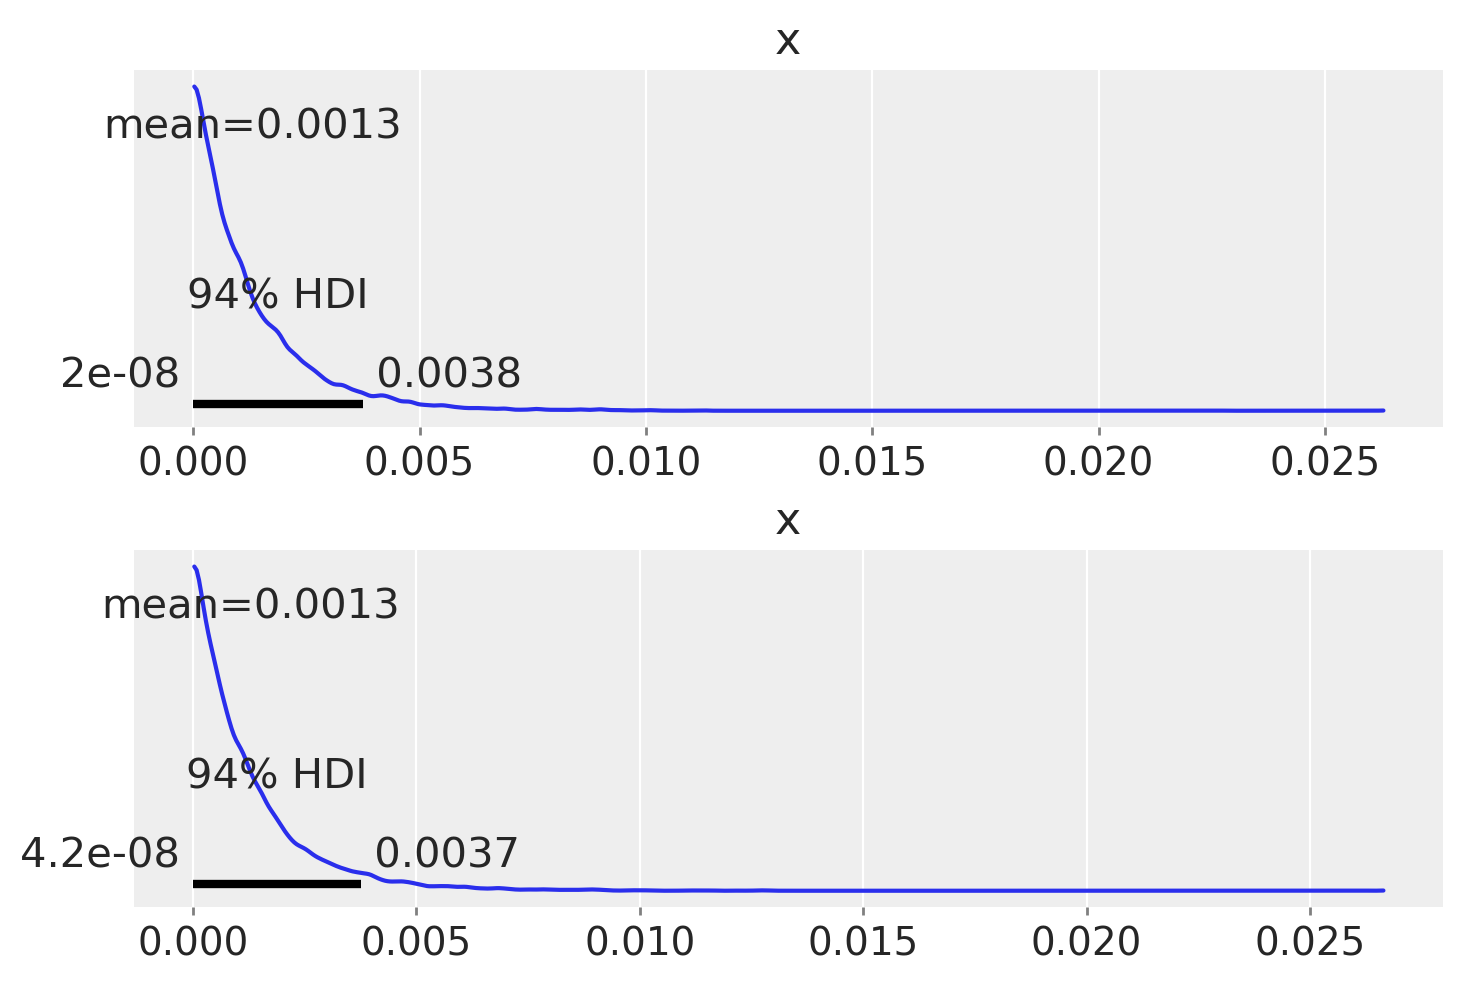

In [219]:
fig, ax = plt.subplots(2)
az.plot_posterior(loss_raise, ax=ax[0])
az.plot_posterior(loss_const, ax=ax[1])
plt.show()

In [220]:
print("expected loss, raise", np.mean(loss_raise), "expected loss, const", np.mean(loss_const))

expected loss, raise 0.0013029899276715488 expected loss, const 0.001289754103112919


So if our goal is to minimize the expected loss, we should hold our rate constant rather than lift rates

# Exercises

(You do not need to use PyMC3 in order to complete the following problems.)

## 1 Two coins in a box

Suppose you have two coins in a box. One is a normal coin with heads on one side and tails on the other, and one is a trick coin with heads on both sides. You choose a coin at random and see that one of the sides is heads. What is the probability that you chose the trick coin?

(From [Think Bayes](https://colab.research.google.com/github/AllenDowney/ThinkBayes2/blob/master/notebooks/chap02.ipynb#scrollTo=gkvvYRv4gQwH) By Allen Downey )

## 2 Monty hall again

There are many variations of the Monty Hall problem.
For example, suppose Monty always chooses Door 2 if he can, and only chooses Door 3 if he has to (because the car is behind Door 2).
If you choose Door 1 and Monty opens Door 2, what is the probability the car is behind Door 3?
If you choose Door 1 and Monty opens Door 3, what is the probability the car is behind Door 2?

(From [Think Bayes](https://colab.research.google.com/github/AllenDowney/ThinkBayes2/blob/master/notebooks/chap02.ipynb#scrollTo=gkvvYRv4gQwH) By Allen Downey)

## 3 Decision Analysis: (ROS Exercise 9.8, p.129)

Simulation for decision analysis: An experiment is performed to measure the efficacy of a television advertising program. The result is an estimate that each minute spent on a national advertising program will increase sales by € 500 000, and this estimate has a standard error of €200 000. Assume the uncertainty in the treatment effect can be approximated by a normal distribution. Suppose ads cost  €300 000 per minute. What is the expected net gain for purchasing 20 minutes of ads? What is the probability that the net gain is negative?

## 4 Decision Analysis Free Problem: 

Based on a regression you have completed earlier or a new regression, construct a decision analysis problem and find a solution. 



# References

Downey, Allen. Think Bayes 2. http://allendowney.github.io/ThinkBayes2/

Salvatier J., Wiecki T.V., Fonnesbeck C. (2016) Probabilistic programming in Python using PyMC3. PeerJ Computer Science 2:e55 DOI: 10.7717/peerj-cs.55.